# Classificazione

## Misure di Valutazione
Finora abbiamo utilizzato regressori lineari e logistici per studiare le relazioni tra le variabili di un dataset. In linea di principio, una volta calcolati, questi due strumenti possono essere utilizzati per fare predizioni su dati mai visti prima. Ad esempio, date nuove misurazioni di tessuto, si potrebbe utilizzare il regressore logistico calcolato precedentemente per determinare in maniera automatica qual è la probabilità che il tessuto contenga un tumore maligno.

Le misure di valutazione della bontà dei regressori viste finora tuttavia, non fanno uso di dati "mai visti" in fase di costruzione del modello. Pertanto, potrebbe accadere che il modello si comporti bene sui dati utilizzati per costruirlo e che poi abbia performance peggiori su dati nuovi. Questo fenomeno è detto **overfitting** in quanto il modello si specializza "troppo" sul set di dati utilizzato per calcolarlo. Quando il modello funziona bene anche su dati nuovi, si parla invece di **generalizzazione**.

Caricheremo il dataset `biopsy` come dataset di esempio:



In [1]:
from statsmodels.datasets import get_rdataset
biopsy = get_rdataset('biopsy',package='MASS')

Definiamo una nuova variabile `cl` come visto negli scorsi laboratori per poter calcolare un regressore logistico in seguito:

In [2]:
biopsy.data['cl'] = biopsy.data['class'].replace({'benign':0, 'malignant':1})

### Training e testing del classificatore
Per verificare quanto il modello è generale e utilizzabile per fare predizioni su dati nuovi, in machine learning di suddivide il dataset in due parti:
 * Training set: verrà utilizzato per "allenare" il modello. Nel caso di un regressore logistico o lineare, questa fase di training, o allenamento, consiste nel calcolo dei parametri del modello;
 * Testing set: verrà utilizzato per misurare le performance del modello. Si tratta del set di dati "nuovi" e non va mai utilizzato per calcolare i parametri del modello.

Se il modello funziona bene sui dati di test dopo essere stato allenato sui dati di training, possiamo ipotizzare che esso funzionerà bene anche nuovi dati mai visti prima.

La suddivisione dei dati in insiemi di training e testing viene in genere fatta in maniera casuale. Si tende inoltre a includere più campioni nel training set. Possiamo utilizzare la funzione `train_test_split` della libreria a tale scopo. Effettuiamo uno split in cui il $25\%$ dei dati è incluso nel testing set, mentre il restante $75\%$ è incluso nel training set:

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
#impostiamo un seed in modo che lo split sia ripetibile
#generalmente non è necessario (né consigliabile!) farlo
#qui lo facciamo per questioni didattiche
np.random.seed(1234)
biopsy_train, biopsy_test = train_test_split(biopsy.data, test_size=0.25)
print(len(biopsy_train))
print(len(biopsy_test))

524
175


> **🙋‍♂️ Domanda 1**
>
> Perché si suddividono i dati in due set asimmetrici, scegliendo un numero maggiore di elementi di training? Quali sono i rischi di un test set troppo piccolo?

Si procede dunque con la fase di training. Nel nostro caso, calcoleremo un regressore logistico utilizzando solo i dati di training. Usiamo il set di variabili ottimale individuato negli scorsi laboratori:

In [4]:
from statsmodels.formula.api import logit
model = logit('cl ~ V1 + V3 + V4 + V6 + V7 + V8',biopsy_train).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.084918
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     cl   No. Observations:                  509
Model:                          Logit   Df Residuals:                      502
Method:                           MLE   Df Model:                            6
Date:                Thu, 29 Nov 2018   Pseudo R-squ.:                  0.8680
Time:                        12:08:23   Log-Likelihood:                -43.223
converged:                       True   LL-Null:                       -327.56
                                        LLR p-value:                1.333e-119
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.9977      1.297     -7.708      0.000     -12.540      -7.455
V1             0.6750      0.154      4.384      0.000       0.373       0.977
V3             0.2576      0.177      1.457      0.145      -0.089       0.604
V4             0.4870      0.149      3.266      0.001       0.195       0.779
V6             0.3201      0.098      3.251      0.001       0.127       0.513
V7             0.4037      0.170      2.370      0.018       0.070       0.738
V8             0.3276      0.134      2.442      0.015       0.065       0.590
==============================================================================
"""

Il coefficiente di `V3` non è più statisticamente rilevante (il set di dati è cambiato rispetto a prima). Rimuoviamo la variabile:

In [5]:
model = logit('cl ~ V1 + V4 + V6 + V7 + V8',biopsy_train).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.087157
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     cl   No. Observations:                  509
Model:                          Logit   Df Residuals:                      503
Method:                           MLE   Df Model:                            5
Date:                Thu, 29 Nov 2018   Pseudo R-squ.:                  0.8646
Time:                        12:08:23   Log-Likelihood:                -44.363
converged:                       True   LL-Null:                       -327.56
                                        LLR p-value:                3.690e-120
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.3177      1.308     -7.885      0.000     -12.882      -7.753
V1             0.7604      0.149      5.116      0.000       0.469       1.052
V4             0.5434      0.147      3.691      0.000       0.255       0.832
V6             0.3649      0.094      3.887      0.000       0.181       0.549
V7             0.4723      0.158      2.988      0.003       0.163       0.782
V8             0.4147      0.120      3.445      0.001       0.179       0.651
==============================================================================
"""

Tutti i coefficienti sono adesso statisticamente rilevanti.

Una volta calcolato il classificatore sul training set, possiamo ottenere le predizioni sul test set come segue:

In [6]:
test_probs = model.predict(biopsy_test.dropna()) #applichiamo dropna per evitare i NaN
test_probs.head()

341    0.001093
532    0.001093
687    0.007106
83     0.045540
428    0.000682
dtype: float64

Il regressore logistico predice delle probabilità. Per ottenre le classi predette ($0$ o $1$), possiamo arrotondare all'intero più vicino come segue:

In [7]:
test_preds = test_probs.round().astype(int)
test_preds.head()

341    0
532    0
687    0
83     0
428    0
dtype: int64

Per valutare la bontà del classificatore, dobbiamo confrontare le classi predette a quelle reali, che vengono in genere dette "classi di ground truth" (gt). Recuperiamo queste classi dal dataset originale:

In [8]:
test_gt = biopsy_test.dropna()['cl']
test_gt.head()

341    0
532    0
687    0
83     0
428    0
Name: cl, dtype: int64

### Misure di valutazione degli errori
Abbiamo detto che per valutare quanto il regressore logistico sia "buono", possiamo confrontare le etichette predette (`train_preds`) con quelle corrette (`train_gt`) contando "quanti errori" vengono fatti dal modello. Nello specifico, esistono diversi modi per misurare le performance di un classificatore. In questo laboratorio vedremo:
 * True Positive (o Hit);
 * False Negative (o Miss);
 * False Positive (o Errore di tipo I o falsi allarmi);
 * True Negative (o correct rejection);
 * Matrice di confusione e sua normalizzazione;
 * Precision;
 * Recall;
 * $F_1$ score;
 * Accuracy.

#### Hit (True Positive) e Miss (False Negative)
Le più semplici misure di performance di un classificatore sono hit e miss. Una predizione può essere classificata come un "hit" o un "miss" come segue: 
 * **hit**: se l'elemento è stato classificato come positivo (variabile dipendente pari a $1$) ed era effettivamente positivo. Si dice anche che l'elemento è un **True Positive (TP)**, ovvero un "vero positivo";
 * **miss**: se l'elemento è stato classificato come negativo (variabile dipendente pari a $0$), ma era in realtà un positivo. L'elemento viene anche detto **False Negative (FN)**, ovvero "faslo negativo". Equivalentemente si parla anche di **errore di tipo II**.

Vediamo come classificare ogni predizione:

In [9]:
#np.logical_and mette in and due array di booleani
hit = np.logical_and(test_gt==1, test_preds==1)
miss = np.logical_and(test_gt==1, test_preds==0)
print(hit.head(),'\n')
print(miss.head())

341    False
532    False
687    False
83     False
428    False
Name: cl, dtype: bool 

341    False
532    False
687    False
83     False
428    False
Name: cl, dtype: bool


Possiamo contare i valori di hit e miss effettuando la somma dei valori (i valori `True` verranno considerati come $1$, mentre i `False` come $0$):

In [10]:
print("Numero di hit:",hit.sum())
print("Numero di miss:",miss.sum())

Numero di hit: 61
Numero di miss: 3


> **🙋‍♂️ Domanda 2**
>
> Cosa possiamo dire del classificatore guardando al numero di hit e miss? I numeri ottenuti vanno rapportati alla dimensione del test set o possono essere interpretati in maniera indipendente da essa?

#### Errori di tipo I o falsi allarmi (False Positive)
Si parla di errori di tipo I o di falsi allarmi per tutti gli elementi che vengono classificati come positivi, ma erano in realtà dei negativi. In questo caso, si parla anche di **False Positive (FP)**, ovvero "falsi positivi". Calcoliamo il numero di falsi allarmi:

In [11]:
false_alarms = np.logical_and(test_gt==0, test_preds==1)
print("Numero di falsi allarmi:",false_alarms.sum())

Numero di falsi allarmi: 2


#### Correct Rejection (True Negative)
Quando un elemento è stato classificato come negativo ed era effettivamente un negativo si parla di **True Negative (TN)**, ovvero "Veri Negativi" o, alternativamente, di "correct rejection". Vediamo come calcolare il numero di veri negativi:

In [12]:
true_negatives = np.logical_and(test_gt==0, test_preds==0)
print("Numero di veri negativi:",true_negatives.sum())

Numero di veri negativi: 108


#### Riepilogo: TP, TN, FP, FN

Riepilogando, ogni elemento può essere considerato come:

 * **True Positive (TP)**: se è stato classificato come positivo ed era effettivamente un positivo;
 * **True Negative (TN)**: se è stato classificato come negativo ed era effettivamente un negativo;
 * **False Positive (FP)**: se è stato classificato come positivo ma era un negativo;
 * **False Negative (FN)**: se è stato classificato come negativo ma era un positivo.
 
Una volta categorizzata ogni predizione in una delle quattro classi, le perfomance del classificatore possono essere riassunte contando il numero di **TP**, **TN**, **FP**, **FN**. I primi due numeri contano le classificazioni corrette, mentre gli ultimi due contano gli errori. Per un buon classificatore, ci aspettiamo dunque di ottenere un numero alto di **TP** e **TN** e numeri bassi di **FP** e **FN**.

### Matrice di Confusione
Una matrice di confusione riassume i quattro numeri appena visti in forma tabulare. La matrice di confusione per un classificatore su $N$ classi può essere definita come una matrice $C$ di dimensioni $N \times N$ in cui l'elemento generale $C_{ij}$ è pari al numero di osservazioni appartenenti alla classe $i$ e predetti come appartenenti alla classe $j$. Considerato che la classe negativa ha indice $0$ e la classe positiva ha indice $1$, nel caso della classificazione binaria, la matrice si presenta come segue:

<br>


<center>
<table class='tab'>
    <tr></tr>
    <tr><td></td><th colspan=2>Predetti</th></tr>
<tr></tr>
<tr>
    <td rowspan=3><b>Reali</b></td>
<td>TN</td><td>FP</td>
</tr>
    <tr></tr>
<tr>
<td>FN</td><td>TP</td>
</tr>
</table>
</center>

Dove TN, FP, FN e TP denotato il numero di True Negative, False Positive, False Negative e True Positive. 

**NOTA**: esistono diversi modi per definire una matrice di confusione. Noi ci rifacciamo al metodo usato da `scikit-learn` per comodità. Può capitare tuttavia di vedere matrici di confusione definite in maniera trasposta (valori predetti lungo le righe e reali lungo le colonne) e nel caso binario, può capitare di avere i valori riordinati come TP, FN, FP, TN. Si noti che tutte queste rappresentazioni sono equivalenti. Nei laboratori considereremo sempre la matrice di confusione nella formulazione qui affrontata.

Possiamo calcolare la matrice di confusione mediante la funzione `confusion_matrix` della libreria `scikit-learn`:

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_gt, test_preds)

array([[108,   2],
       [  3,  61]])

> **🙋‍♂️ Domanda 3**
>
> Si studi la matrice di confusione. I numeri ottenuti corrispondono ai valori di TN, FP, FN, TP calcolati a mano in precedenza?

Possiamo ottenere i valori separati di TN, FP, FN e TP semplicemente come segue:

In [14]:
tn, fp, fn, tp = confusion_matrix(test_gt, test_preds).ravel()
print("Numero di True Negative:",tn)
print("Numero di False Positive:",fp)
print("Numero di False Negative:",fn)
print("Numero di Ture Positive:",tp)

Numero di True Negative: 108
Numero di False Positive: 2
Numero di False Negative: 3
Numero di Ture Positive: 61


#### Normalizzazione della matrice di confusione - TNR, TPR, FNR, FPR
La matrice di confusione riporta il numero di errori e predizioni corrette. Questi numeri vanno interpretati considerando la numerosità delle classi (un TP pari a $50$ va interpretato in maniera diversa se sono presenti $70$ o $1000$ elementi in quella classe) e possono essere difficili da leggere quando le classi non sono perfettamente bilanciate. Per ovviare a questi problemi, è possibile normalizzare la matrice per righe, ovvero dividere ogni elemento $C_{ij}$ per $C_i=\sum_j{C_{ij}}$.

Si noti che la somma dei valori lungo una riga della matrice di confusione indica il numero di elementi appartenenti a quella classe:

<br>
<center>
<table class='tab'>
    <tr></tr>
    <tr><td></td><th colspan=2>Predetti</th><th>Somma Riga</th></tr>
<tr></tr>
<tr>
    <td rowspan=3><b>Reali</b></td>
    <td>TN</td><td>FP</td><td>N = TN+FP</td>
</tr>
    <tr></tr>
<tr>
<td>FN</td><td>TP</td><td>P = TP+FN</td>
</tr>
</table>
</center>

Dopo la normalizzazione otteniamo dunque:

<br>
<center>
<table class='tab'>
    <tr></tr>
    <tr><td></td><th colspan=2>Predetti</th></tr>
<tr></tr>
<tr>
    <td rowspan=3><b>Reali</b></td>
    <td>TN/N</td><td>FP/N</td>
</tr>
    <tr></tr>
<tr>
<td>FN/P</td><td>TP/P</td>
</tr>
</table>
</center>

I numeri nella matrice di confusione normalizzata hanno nomi e interpretazioni specifiche:
 * **True Negative Rate**: definito come $TNR=\frac{TN}{N}$, indica la frazione di elementi negativi che sono stati effettivamente classificati come negativi;
 * **True Positive Rate**: definito come $TPR=\frac{TP}{P}$, indica la frazione di elementi positivi che sono stati effettivamente classificati come positivi;
 * **False Positive Rate**: definito come $FPR=\frac{FP}{N}$, indica la frazione di elementi negativi che sono stati erroneamente classificati come positivi;
 * **False Negative Rate**: definito come $FNR=\frac{FN}{P}$, indica la frazione di elementi positivi che sono stati erroneamente classificati come negativi.
 
Possiamo infine vedere la matrice di confusione normalizzata come segue:

<br>
<center>
<table class='tab'>
    <tr></tr>
    <tr><td></td><th colspan=2>Predetti</th></tr>
<tr></tr>
<tr>
    <td rowspan=3><b>Reali</b></td>
    <td>TNR</td><td>FPR</td>
</tr>
    <tr></tr>
<tr>
<td>FNR</td><td>TPR</td>
</tr>
</table>
</center>

La matrice di confusione normalizzata viene calcolata come segue:

In [15]:
cm = confusion_matrix(test_gt, test_preds)
cm=cm/cm.sum(1).reshape(-1,1)#il reshape serve a trasformare il vettore in un vettore colonna
cm

array([[0.98181818, 0.01818182],
       [0.046875  , 0.953125  ]])

Analogamente a quanto vista prima, possiamo ottenere TNR, FNR, FPR e TPR come segue:

In [16]:
tnr, fpr, fnr, tpr = cm.ravel()
print("TNR:",tnr)
print("FPR:",fpr)
print("FNR:",fnr)
print("TPR:",tpr)

TNR: 0.9818181818181818
FPR: 0.01818181818181818
FNR: 0.046875
TPR: 0.953125


> **🙋‍♂️ Domanda 4**
>
> Si confronti la matrice di confusione normalizzata con quella non normalizzata. Quale delle due offre un quadro più chiaro?

Si noti che, per valutare le performance di un classificatore, è necessario analizzare tutti i e 4 i numeri appena visti. Esistono infatti dei casi in cui osservare solo alcuni indicatori fornisce un quadro parziale della situazione. Vediamo qualche esempio.

#### Precision, Recall e F-Measure

Altre due importanti misure di performance sono **precision** e **recall**. Si tratta di due misure complementari, definibili come segue:
 * La **precision** misura **quanti dei valori predetti come positivi sono in effetti positivi**. Si misura come segue: $Precision = \frac{TP}{TP+FP}$;
 * La **recall** misura **quanti tra gli elementi effettivamente positivi, sono stati individuati dal classificatore**. SI misura come segue: $recall=\frac{TP}{TP+FN}=TPR$ (la recall è il $TPR$ sono la stessa cosa).
 
Le due misure sono complementari. Consideriamo due classificatore sbilanciati:
 * Un classificatore $C_1$ che classifica un elemento come positivo solo quando ne è assolutamente certo. Tutti i positivi predetti da questo classificatore saranno corretti, ma molti positivi saranno classificati come negativi;
 * Un classificatore $C_2$ che classifica tutti gli elementi come positivi e non prevede mai che un elemento sia negativo.
 
Il classificatore $C_1$ avrà precision alta in quanto ci sono pochissimi falsi positivi, ma recall bassa in quanto ci sono molti falsi negativi. Il classificatore $C_2$ avrà precision bassa per via della presenza di molti falsi positivi, mentre avrà recall pari a uno per l'assenza di falsi negativi.

Vista questa complementarietà, **precision** e **recall** vanno **sempre guardate insieme**. Possiamo calcolare precision e racall come segue:

In [17]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(test_gt, test_preds)
recall = recall_score(test_gt, test_preds)
print("Precision: {:0.2f}, Recall: {:0.2f}".format(precision,recall))

Precision: 0.97, Recall: 0.95


Un modo per guardare a precision e recall insieme, consiste nel calcolare lo score $F_1$, che si definisce come la media armonica tra precision e recall:

$$F_1 = 2 \cdot \frac{precision \cdot recall}{precision + recall}$$

Lo score $F_1$ può essere calcolato come segue:

In [18]:
from sklearn.metrics import f1_score
f1 = f1_score(test_gt, test_preds)
print("F1 score: {:0.2f}".format(f1))

F1 score: 0.96


#### Accuracy
Abbiamo visto che per valutare bene un classificatore, dobbiamo guardare alla matrice di confusione nella sua interezza. Una misura molto semplice che ci permette di ottenere un unico numero da guardare per valutare un classificatore è l'accuracy. L'accuracy misura la frazione di campioni che sono stati correttamente classificati. Essa si calcola come segue:

$$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$$

Sommando TP e TN otteniamo il numero di elementi classificati correttamente (si noti che ciò corrisponde a sommare tutti gli elementi sulla diagonale principale della matrice di confusione non normalizzata). Sommando TP, TN, FP e FN otteniamo il numero totale degli elementi contenuti nel dataset.

Possiamo calcolare l'accuracy sommando gli elementi sulla diagonale principale della matrice di confusione non normalizzata:

In [19]:
cm = confusion_matrix(test_gt, test_preds)
print(np.diag(cm).sum()/cm.sum())

0.9712643678160919


Alternativamente, possiamo calcolare l'accuracy utilizzando la funzione `accuracy_score` di  `scikit-learn`:

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(test_gt, test_preds)

0.9712643678160919

Questo numero viene spesso interpretato come una percentuale: "il $97\%$ dei campioni sono stati correttamente classificati". 

### 1.3 Uso delle diverse misure di performance
Abbiamo visto che esistono diverse misure di valutazione. In pratica, è spesso conveniente osservare più di una misura alla volta per non farci trarre in inganno. Vediamo qualche esempio con dati "inventati" per illustrare qualcuno di questi casi.

#### Classificatore sempre positivo
Consideriamo un classificatore che prevede sempre la classe positiva. Possiamo simulare le sue predizioni come segue:

In [21]:
positive_preds = np.ones_like(test_gt)

Calcoliamo TNR, FPR, FNR e TPR

In [22]:
cm = confusion_matrix(test_gt, positive_preds)
tn, fp, fn, tp = cm.ravel()
cm=cm/cm.sum(1).reshape(-1,1)
acc = accuracy_score(test_gt, positive_preds)
precision = precision_score(test_gt, positive_preds)
f1 = f1_score(test_gt, positive_preds)
tnr, fpr, fnr, tpr = cm.ravel()
print("TNR: %0.2f"%tnr)
print("FPR: %0.2f"%fpr)
print("FNR: %0.2f"%fnr)
print("TPR, Recall: %0.2f"%tpr)
print("Precision: %0.2f"%precision)
print("F1: %0.2f"%f1)
print("Accuracy: %0.2f"%acc)
cm

TNR: 0.00
FPR: 1.00
FNR: 0.00
TPR, Recall: 1.00
Precision: 0.37
F1: 0.54
Accuracy: 0.37


array([[0., 1.],
       [0., 1.]])

Come possiamo notare, il classificatore presenta una reacall (TPR) pari a $1$, e un FNR uguale a $0$. Ciò indica che tutti gli elementi positivi sono stati in effetti classificati come positivi e che nessuno dei positivi è stato classificato come negativo. Tuttavia, guardando anche a TNR e FNR, ci accorgiamo che il classificatore è degenere e non è capace di classificare i negativi. Precision, accuracy e F1, inoltre, indicano che il classificatore non è buono. Un quadro più chiaro è offerto dalla matrice di confusione normalizzata:

In [23]:
cm

array([[0., 1.],
       [0., 1.]])

#### Classificatore sempre negativo
Analogamente, potremmo trovarci in presenza di un classificatore che prevede sempre la classe negativa:

In [24]:
negative_preds = np.zeros_like(test_preds)
cm = confusion_matrix(test_gt, negative_preds)
tn, fp, fn, tp = cm.ravel()
cm=cm/cm.sum(1).reshape(-1,1)
acc = accuracy_score(test_gt, negative_preds)
precision = precision_score(test_gt, negative_preds)
f1 = f1_score(test_gt, negative_preds)
tnr, fpr, fnr, tpr = cm.ravel()
print("TNR: %0.2f"%tnr)
print("FPR: %0.2f"%fpr)
print("FNR: %0.2f"%fnr)
print("TPR, Recall: %0.2f"%tpr)
print("Precision: %0.2f"%precision)
print("F1: %0.2f"%f1)
print("Accuracy: %0.2f"%acc)
cm

TNR: 1.00
FPR: 0.00
FNR: 1.00
TPR, Recall: 0.00
Precision: 0.00
F1: 0.00
Accuracy: 0.63


/home/furnari/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/furnari/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


array([[1., 0.],
       [1., 0.]])

Come notiamo dai warning, precision e F1 non sono ben definite in questo caso.

##### Accuracy e sbilanciamento delle classi
**Attenzione:** benché l'accuracy sia di facile interpretazione, anche essa ha i suoi limiti. Infatti, se il numero di elementi nelle classi è molto sbilanciato, un classificatore degenere può ottenere una accuracy alta. Vediamo un esempio concreto. Supponiamo che un classificatore binario sia caratterizzato dalla seguente matrice di confusione:

In [25]:
cm = np.array([[72,0],[10,0]])
cm

array([[72,  0],
       [10,  0]])

Dalla matrice di confusione evinciamo che il classificatore predice solo la classe negativa. Tuttavia $72$ elementi appartengono alla classe positiva, mentre solo $10$ appartengono alla classe negativa. Calcoliamo l'accuracy relativa a questa matrice di confusione:

In [26]:
print("Accuracy: %0.2f" % (np.diag(cm).sum()/cm.sum()))

Accuracy: 0.88


Nonostante il classificatore sia degenere (ce ne accorgiamo dalla matrice di confusione), esso ottiene una buona accuracy. In questi casi, lo $F_1$ score può offrirci un quadro più chiaro.

### Nota sulle diverse misure di valutazione di performance

Abbiamo visto che esistono diverse misure per valutare le performance di un algoritmo (e ne esistono molte altre non trattate in questo laboratorio!). Ogni misura cattura un aspetto diverso del classificatore e dunque, a seconda del problema considerato è opportuno scegliere la misura più corretta per la valutazione delle performance. Vediamo qualche esempio:

 * **Classificazione di email di spam vs non spam**: supponiamo che "spam" rappresenti la classe positiva e che "non-spam" rappresenti la classe negativa. Da un lato, vorrei un sistema capace di individuare bene entrambe le categorie, dall'altro voglio evitare di cestinare email legittime come "spam". In questo caso ha senso cercare di costruire un sistema che ottiene una **recall** accettabile (=email di spam effettivamente individuate) con valori di **FPR** bassissimi (=poche email cestinate come spam) e valori di **precision** alti (=ciò che ho individuato come spam era effettivamente spam);
 * **Diagnosi precoce di tumori**: si vuole adoperare un sistema di diagnosi precoce dei tumori automatica. Tutti i casi individuati come tumori verranno in seguito analizzati da un esperto che potrà rigettare i casi di errore. I casi non classificati come tumori vengono analizzati nuovamente solo $6$ mesi dopo. Se la presenza di un tumore è indicata dalla classe positiva, vogliamo costruire un sistema che abbia **reacall** pari a $1$ (tutti i tumori sono correttamente identificati) anche al costo di un **FPR** non bassissimo o di una **precision** non altissima (qualche negativo viene identificato come positivo - gli esami successivi potranno correggere questo risultato);
 * **Classificatore delle iris di Fisher**: il dataset è bilanciato ($150$ esempi per classi). In questi casi l'**accuracy** può essere una buona misura di valutazione.

> **🙋‍♂️ Domanda 5**
>
> Si vuole costruire un sistema automatico per l'analisi di componenti elettronici prodotti da una fabbrica. Il sistema analizza delle misurazioni effettuate su alcuni elementi e determina se il componente può essere passato alla vendita o se va cestinato. Il sistema deve permettere di mantenere uno standard qualitativo alto con pochi pezzi difettosi effettivamente venduti (tali pezzi potranno poi essere sostituiti dopo la notifica dell'acquirente). Che misure di valutazione conviene considerare durante la costruzione del sistema?

### Errore di training e errore di generalizzazione

Finora abbiamo applicato le misure di valutazione sul test set. Ciò ci permette di capire se il modello può essere utilizzato su nuovi dati non visti in fase di training e dunque se il modello "generalizza" a dati nuovi. L'errore ottenuto sul test set è dunque in genere detto anche "errore di generalizzazione".

Un'altra misura che ci permette di capire quanto il classificatore sia buono, soprattutto se confrontata all'errore di generalizzazione, è l'errore di training, ovvero l'errore calcolato sul training set. Vediamo come ottenerlo:

In [27]:
#Calcoliamo le predizioni sul test set
train_preds = model.predict(biopsy_train.dropna()).round().astype(int)

#Otteniamo le etichette di ground truth di test
train_gt = biopsy_train.dropna()['cl']

#calcoliamo accuracy e matrice di confusione normalizzata
cm = confusion_matrix(train_gt, train_preds)
cm = cm/cm.sum(1).reshape(-1,1)
acc = accuracy_score(train_gt, train_preds)
print("\nAccuracy di test: %0.2f\n" % acc)
print("Matrice di confusione normalizzata:\n")
print(cm)


Accuracy di test: 0.97

Matrice di confusione normalizzata:

[[0.9760479  0.0239521 ]
 [0.03428571 0.96571429]]


Confrontiamo i valori ottenuti con quelli di test:

In [28]:
#calcoliamo accuracy e matrice di confusione normalizzata
cm_test = confusion_matrix(test_gt, test_preds)
cm_test = cm_test/cm_test.sum(1).reshape(-1,1)
acc_test = accuracy_score(test_gt, test_preds)
print("\nAccuracy di test: %0.2f\n" % acc_test)
print("Matrice di confusione normalizzata:\n")
print(cm_test)


Accuracy di test: 0.97

Matrice di confusione normalizzata:

[[0.98181818 0.01818182]
 [0.046875   0.953125  ]]


L'accuracy è praticamente identica. La matrice di confusione sul training set appare leggermente più bilanciata. Possiamo concludere che il modello generalizza bene.

> **🙋‍♂️ Domanda 6**
>
> Si supponga che un classificatore abbia errore di training basso ed errore di generalizzazione alto. Come si chiama questo tipo di condizione?

### Classificazione Basata su Soglia e Curve ROC

Consideriamo nuovamente il nostro dataset di altezze e pesi:

In [29]:
import pandas as pd
import numpy as np
data=pd.read_csv('http://iplab.dmi.unict.it/furnari/downloads/height_weight.csv')
data.head()

,sex,BMI,height,weight
0,M,33.36,187.96,117.933920
1,M,26.54,177.80,83.914520
2,F,32.13,154.94,77.110640
3,M,26.62,172.72,79.378600
4,F,27.13,167.64,76.203456


Abbiamo visto che le altezze di uomini e donne si distribuiscono diversamente. Rivediamo velocemente alcune statistiche descrittive dei due set di dati:

In [30]:
print(data[data['sex']=='M']['height'].describe(),'\n')
print(data[data['sex']=='F']['height'].describe())

count    1946.000000
mean      177.631624
std         7.395885
min       160.020000
25%       172.720000
50%       177.800000
75%       182.880000
max       193.040000
Name: height, dtype: float64 

count    2285.000000
mean      163.303659
std         6.522939
min       149.860000
25%       157.480000
50%       162.560000
75%       167.640000
max       177.800000
Name: height, dtype: float64


Abbiamo visto in particolare che le donne sono in genere più basse degli uomini. Ci chiediamo dunque cosa possiamo dire del sesso di un soggetto conoscendone solo l'altezza. Sappiamo ad esempio che un soggetto alto 180 cm è molto più probabilmente un uomo che una donna. Analogamente un soggetto alto 150 cm sarà più probabilmente una donna. Cosa possiamo dire di un soggetto alto 170 cm? In generale ci aspettiamo che esista un **valore soglia** al di sopra del quale è più probabile trovare soggetti maschili che femminili. Resta da capire come trovare tale valore soglia. Supponiamo ad esempio di scegliere arbitrariamente 170 cm come valore soglia. 

Se volessimo usare tale valore soglia per predire il sesso dei soggetti, dovremmo semplicemente classificare come uomini tutti i campioni con altezza superiore o uguale a 170 cm e viceversa come donne i campioni con altezza inferiore a 170 cm. Costruiamo un vettore **male_pred** che contenga True in corrispondenza dei soggetti classificati come uomini e False altrove:

In [31]:
male_pred = data.height>=170
male_pred.head()

0     True
1     True
2    False
3     True
4    False
Name: height, dtype: bool

Se vogliamo misurare la bontà delle predizioni, abbiamo bisogno di confrontare il vettore ottenuto con il vettore di **ground truth**, ovvero il vettore dei sessi corretti. Possiamo ottenere tale vettore come segue:

In [32]:
male_gt = data.sex=='M' #"gt" sta per ground truth
male_gt.head()

0     True
1     True
2    False
3     True
4    False
Name: sex, dtype: bool

Per valutare la bontà delle predizioni, calcoliamo due numeri: il **True Positive Rate** (**TPR**) per misurare quanti positivi sono stati trovati e il **False Positive Rate** (**FPR**) per misurare quanti negativi sono stati classificati come positivi. Chiaramente, vorremmo un **TPR** alto e un **FPR** basso:

In [33]:
cm = confusion_matrix(male_gt, male_pred)
cm=cm/cm.sum(1).reshape(-1,1)
_, fpr, _, tpr = cm.ravel()
print("False Positive Rate: {:0.2f}".format(fpr))
print("True Positive Rate: {:0.2f}".format(tpr))

False Positive Rate: 0.21
True Positive Rate: 0.87


Gli score ci dicono che **l'86% dei soggetti maschili sono stati effettivamente classificati come maschi** e che **il 21% dei soggetti femminili sono stati erroneamente classificati come uomini**. E' naturale chiedersi se esiste un'altra sogli migliore di quella che abbiamo considerato. Proviamo a ripetere il processo per $165$ cm:

In [34]:
def classify(dataframe, threshold):
    return dataframe['height']>=threshold

male_pred = classify(data, 165)
cm = confusion_matrix(male_gt, male_pred)
cm=cm/cm.sum(1).reshape(-1,1)
_, fpr, _, tpr = cm.ravel()
print("False Positive Rate: {:0.2f}".format(fpr))
print("True Positive Rate: {:0.2f}".format(tpr))

False Positive Rate: 0.45
True Positive Rate: 0.97


Proviamo con una soglia pari a 175 cm:

In [35]:
male_pred = classify(data, 175)
cm = confusion_matrix(male_gt, male_pred)
cm=cm/cm.sum(1).reshape(-1,1)
_, fpr, _, tpr = cm.ravel()
print("False Positive Rate: {:0.2f}".format(fpr))
print("True Positive Rate: {:0.2f}".format(tpr))

False Positive Rate: 0.06
True Positive Rate: 0.67


> **🙋‍♂️ Domanda 7**
>
> I risultati ottenuti con le due nuove soglie sono migliori o peggiori dei primi? Qual è il risultato migliore?

Abbiamo visto che cambiando il valore della soglia, i valori di **TPR** e **FPR** cambiano a loro volta. In particolare abbiamo notato che al crescere dell'uno diminuisce l'altro e viceversa. Se vogliamo vedere cosa succede per diversi valori della soglia, possiamo visualizzare una curva **ROC**.

Una curva **ROC** effettua la classificazione con tutte le soglie possibili e calcola i valori di **TPR** e **FPR** per ciascuno dei classificatori. Le coppie di valori **TPR** e **FPR** vengono dunque plottati come punti su un piano. La funzione `roc_curve` di `scikit_learn` ci permette di ottenere le coppie di valori **TPR** e **FPR** che si ottengono sogliando un dato valore detto "score":

In [44]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(male_gt, data['height'])

La funzione `roc_curve` restituisce i valori calcolati per **FPR**, **TPR** e le soglie utilizzate per calcolare tali valori. Plottiamo la curva ROC:

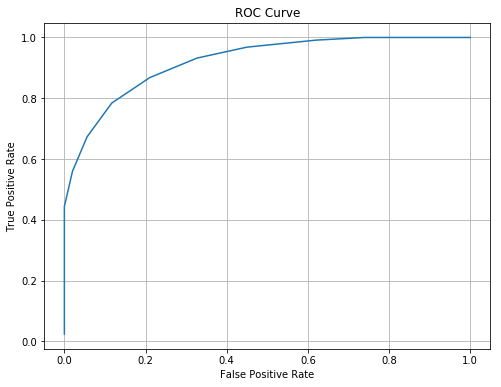

In [45]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr)
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

La curva **ROC** mostra come il **TPR** decresce al crescere del **FPR**. In pratica, ogni valore della threshold definisce un classificatore che effettua un **compromesso** tra **TPR** e **FPR**. Per valori molto alti della soglia, riusciamo a massimizzare il **TPR** ottenendo un **FPR** alto (il che non è desiderabile). Per valori molto bassi della soglia, riusciamo a minimizzare il **FPR** ma otteniamo un **TPR** molto basso (anche in questo caso non desiderabile).

In generale, la curva **ROC** ci permette di osservare le performance di un classificatore **indipendentemente dal valore della soglia utilizzato**. Idealmente, vorremmo che la nostra curva includesse il punto di coordinate (0,1), ovvero vorremmo che esistesse almeno una soglia per la quale otteniamo **TPR** pari a 1 e **FPR** pari a 0. Analogamente, vorremmo che la curva si trovasse sempre al di sopra dalla diagonale principale, sulla quale un incremento di **TPR** non corrisponderebbe a un decremento di **FPR**. Vediamo di plottare due prototipi della **curva ideale** e della **curva pessima**:

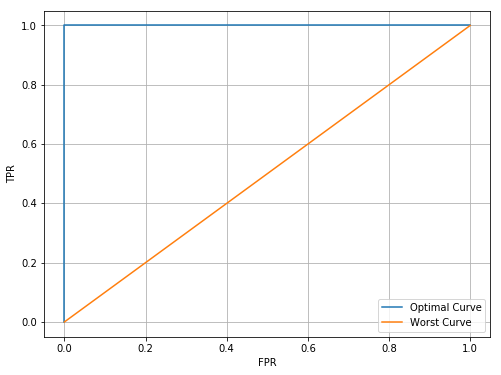

In [38]:
fpr_best = np.linspace(0,1,100)
tpr_best = np.ones(100)

plt.figure(figsize=(8,6))
plt.plot([0]+list(fpr_best),[0]+list(tpr_best))
plt.plot(fpr_best,fpr_best)

plt.grid()
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend(['Optimal Curve','Worst Curve'])
plt.show()

Più la nostra curva "somiglia" alla curva ottima, migliore è il classificatore. Quando il classificatore prevede le classi in maniera totalmente casuale, otteniamo la curva pessima.

Abbiamo detto che le curve ROC sono buone per valutare la bontà di un classificatore indipendentemente dalla soglia usata per classificare. In particolare, le curve ROC possono essere usate per confrontare più classificatori. Supponiamo di costruire un classificatore analogo basato sulle misure dei pesi. Confrontiamo le due curve ROC:

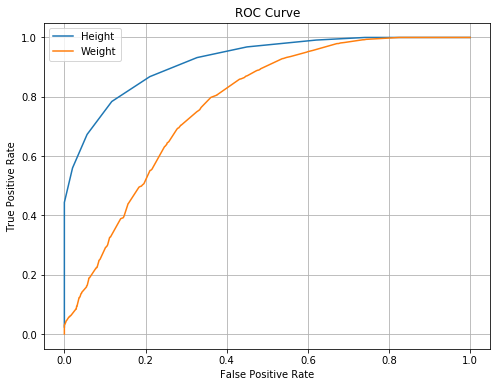

In [39]:
def plot_roc(fpr,tpr):
    plt.plot(fpr,tpr)
    plt.grid()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    
fpr_h,tpr_h,t_h=roc_curve(data.sex=='M', data.height)
fpr_w,tpr_w,t_w=roc_curve(data.sex=='M', data.weight)

plt.figure(figsize=(8,6))
plot_roc(fpr_h,tpr_h)
plot_roc(fpr_w,tpr_w)
plt.legend(['Height','Weight'])
plt.grid()
plt.show()

> **🙋‍♂️ Domanda 8**
>
> Quale delle due variabili è più discriminativa nel nostro esempio? Esiste una soglia per la quale i pesi sono più discriminativi delle altezze?

Resta ancora da capire come scegliere una buona soglia per il classificatore. Abbiamo detto che la soglia va scelta sulla base di un qualche criterio legato all'applicazione in cui utilizzeremo il classificatore. Supponiamo di voler trovare la soglia che massimizzi **TPR** e minimizzi **FPR** e supponiamo che i due score abbiano lo stesso peso nella nostra applicazione. Possiamo dunque scegliere la soglia che massimizza la somma **TPR+(1-FPR)**. Vediamo come questo valore cambia al cambiare delle soglie:

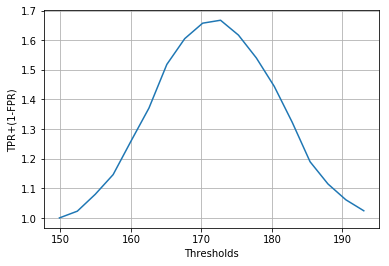

In [40]:
score = tpr_h+1-fpr_h
plt.plot(t_h,score)
plt.xlabel('Thresholds')
plt.ylabel('TPR+(1-FPR)')
plt.grid()
plt.show()

Possiamo osservare che esiste un massimo globale. Troviamo la soglia in corrispondenza della quale si ha tale massimo:

In [41]:
optimal_threshold = t_h[np.argmax(score)]
print("La soglia migliore è %0.2f" % optimal_threshold)

La soglia migliore è 172.72


Calcoliamo dunque TPR e FPR per il classificatore individuato da questa soglia:

In [42]:
preds = classify(data,optimal_threshold)
cm = confusion_matrix(male_gt, preds)
cm=cm/cm.sum(1).reshape(-1,1)
_, fpr, _, tpr = cm.ravel()
print("False Positive Rate: {:0.2f}".format(fpr))
print("True Positive Rate: {:0.2f}".format(tpr))

False Positive Rate: 0.12
True Positive Rate: 0.78


> **🙋‍♂️ Domanda 9**
>
> Si ripeta il processo di selezione della soglia utilizzando i pesi invece delle altezze. Qual è la soglia ottimale ottenuta?

## Classificazione Nearest Neighbor (K-NN)

Un classificatore Nearest Neighbor (K-NN) permette di classificare i dati confrontandoli con un insieme pre-esistente di dati etichettati (il training set). Sia $\mathbf{X}=\{(\mathbf{x}_i, y_i)\}_{i=1}^N$ un dataset etichettato, dove $\mathbf{x}_i$ rappresentano i campioni del dataset e $y_i$ rappresentano le relative etichette e sia $\overline{\mathbf{x}}$ un nuovo campione di test da classificare. L'algoritmo K-NN cerca prima i $K$ campioni del training set più simili a $\overline{\mathbf{x}}$ secondo una qualche misura di similarity $\delta$. La classificazione avviene dunque assegnando a $\overline{\mathbf{x}}$ l'etichetta più frequente fra le $K$ etichette $y_i$ dei campioni di training trovati. Per evitare situazioni di incertezza, di solito si sceglie un valore di $K$ non multiplo del numero di classi. Nel caso in cui $K = 1$, l'algoritmo assegna a $\overline{\mathbf{x}}$ l'etichetta del campione più simile nel training set.

Vediamo un esempio con il dataset degli iris di Fisher. Carichiamo il dataset:

In [ ]:
from statsmodels.datasets import get_rdataset
fisher = get_rdataset('iris')
fisher.data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Consideriamo per il momento solo due features, ma consideriamo tutte e tre le classi:

In [ ]:
import pandas as pd
data = fisher.data
#costruiamo un dataframe vuoto
df = pd.DataFrame()
#inserieamo le prime due feature e chiamiamole X e Y
df['X'] = data['Sepal.Length']
df['Y'] = data['Sepal.Width']
#inseriamo una colonna "C" che contenga le classi
df['C'] = data['Species']

data = df
data.head()

,X,Y,C
0,5.1,3.5,setosa
1,4.9,3.0,setosa
2,4.7,3.2,setosa
3,4.6,3.1,setosa
4,5.0,3.6,setosa


Suddividiamo adesso il dataset in training e test set:

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

#dato che il dataset è molto piccolo, prendiamo il 90% dei dati per formare il training set
np.random.seed(134)
data_training, data_test = train_test_split(data,test_size=0.25)

print("Numero di campioni di training:",len(data_training))
print(data_training.head())
print()
print("Numero di campioni di test:",len(data_test))
print(data_test.head())

Numero di campioni di training: 112
       X    Y           C
60   5.0  2.0  versicolor
143  6.8  3.2   virginica
144  6.7  3.3   virginica
127  6.1  3.0   virginica
8    4.4  2.9      setosa

Numero di campioni di test: 38
       X    Y           C
65   6.7  3.1  versicolor
46   5.1  3.8      setosa
99   5.7  2.8  versicolor
101  5.8  2.7   virginica
47   4.6  3.2      setosa


Visualizziamo i campioni di training e test nello spazio 2D:

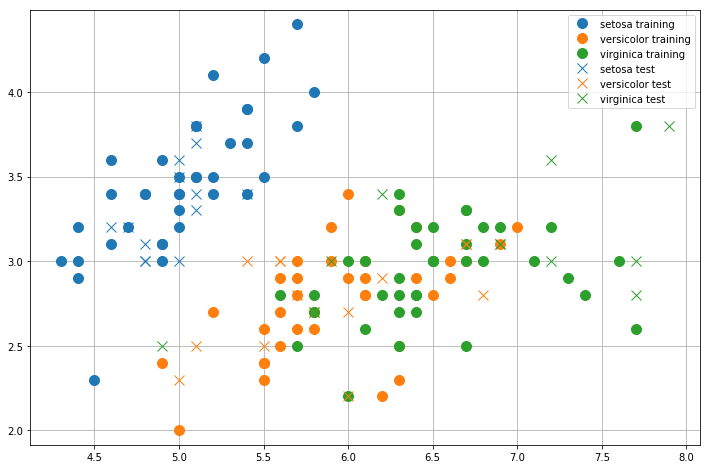

In [ ]:
from matplotlib import pyplot as plt
def plot2d(data, label_suffix='', marker='o'):
    classes = sorted(data['C'].unique())
    for c in classes:
        plt.plot(data.where(data['C']==c).dropna().X.values,
                 data.where(data['C']==c).dropna().Y.values,'o', label=c+label_suffix, marker=marker, markersize=10)

    plt.axis('equal')

plt.figure(figsize=(12,8))
plot2d(data_training,' training', marker='o')
#azzero i colori in modo da avere glis tessi colori per training e test set
plt.gca().set_prop_cycle(None)
plot2d(data_test,' test', marker='x')
plt.grid()
plt.legend()
plt.show()

> **🙋‍♂️ Domanda 10**
>
> Come verrebbero classificati i dati di training da un classificatore 1-NN? La classificazione sarebbe sempre corretta? Un SVM lineare farebbe meglio o peggio di 1-NN in questo caso?

Costruiamo adesso un classificatore 1-NN mediante scikit-learn:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN

knn_1 = KNN(n_neighbors=1)
knn_1.fit(data_training.drop('C',axis=1), data_training.C)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

Di default, il classificatore verrà costruito considerando la distanza Euclidea come misura di similarità tra i campioni. Calcoliamo adesso le accuracy di training e test:

In [ ]:
print("Accuracy sul training set: %0.2f" % knn_1.score(data_training.drop('C',axis=1), data_training.C))
print("Accuracy sul test set: %0.2f" %  knn_1.score(data_test.drop('C',axis=1), data_test.C))

Accuracy sul training set: 0.95
Accuracy sul test set: 0.74


> **🙋‍♂️ Domanda 11**
>
> Perché l'accuracy sul training set non è pari a $1$? Si risponda guardando al grafico mostrato sopra.

L'algortimo KNN suddivide implicitamente lo spazio dei dati in delle regioni di decisione, dove il valore di decisione in un particolare punto dello spazio dipende dalla classe di appartenenza dei K vicini più prossimi. Per visualizzare le regioni di decisione e dunque il decision boundary, possiamo effettuare la classificazione per una griglia uniforme di punti:

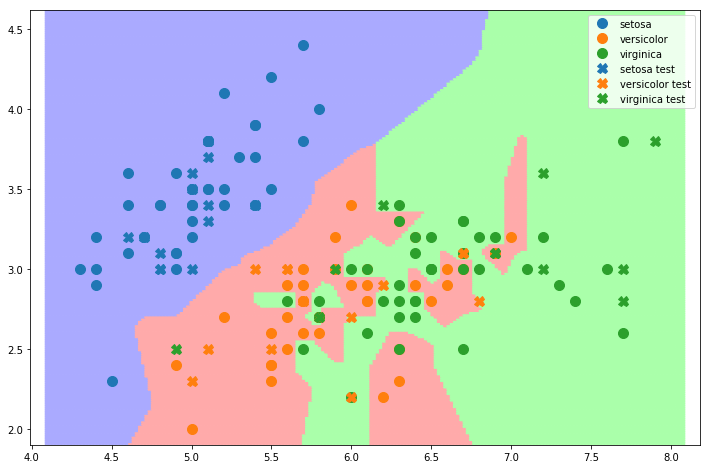

In [ ]:
import numpy as np
from matplotlib.colors import ListedColormap
#creiamo una colormap per mostrare le regioni di decisione
cmap_light = ListedColormap(['#AAAAFF', '#FFAAAA', '#AAFFAA' ])
import matplotlib.patches as mpatches

def plot_knn_decision_boundary(data, knn):
    plot2d(data)
    X = np.linspace(data['X'].min()*0.95, data['X'].max()*1.05,200)
    Y = np.linspace(data['Y'].min()*0.95, data['Y'].max()*1.05,200)
    X,Y = np.meshgrid(X,Y)
    
    Z = knn.predict(np.c_[X.ravel(), Y.ravel()])
    
    #costruiamo un dizionario per transformare le stringhe in indici
    class_dict = {c:i for i,c in enumerate(knn.classes_)}
    
    Z=list(map(lambda x: class_dict[x],Z))
    Z = np.array(Z).reshape(X.shape)
    
    plt.pcolormesh(X, Y, Z, antialiased=True, cmap=cmap_light)
    #plt.contour(X,Y,Z)

plt.figure(figsize=(12,8))
plot_knn_decision_boundary(data_training,knn_1)
plt.gca().set_prop_cycle(None)
plot2d(data_test,label_suffix=' test', marker='X')
plt.legend()

plt.show()

> **🙋‍♂️ Domanda 12**
>
> Lo spazio è stato suddiviso in maniera plausibile? Ci sono delle regioni in cui si potrebbe fare di meglio? A cosa sono dovuti gli errori di test?

Proviamo adesso a costruire un classificatore $7-NN$:

In [ ]:
knn_7 = KNN(n_neighbors=7)
knn_7.fit(data_training.drop('C',axis=1), data_training.C)
print("Accuracy sul training set: %0.2f" % knn_7.score(data_training.drop('C',axis=1), data_training.C))
print("Accuracy sul test set: %0.2f" %  knn_7.score(data_test.drop('C',axis=1), data_test.C))

Accuracy sul training set: 0.84
Accuracy sul test set: 0.82


Visualizziamo il decision boundary di questo classificatore:

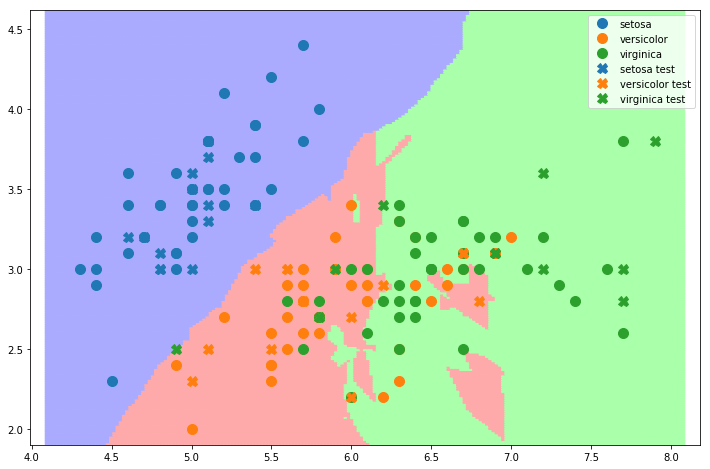

In [ ]:
plt.figure(figsize=(12,8))
plot_knn_decision_boundary(data_training,knn_7)
plt.gca().set_prop_cycle(None)
plot2d(data_test,label_suffix=' test', marker='X')
plt.legend()

plt.show()

> **🙋‍♂️ Domanda 13**
>
> In che modo è cambiato il decision boundary? 

### Trovare il valore ottimale di K

Abbiamo visto come diverse scelte di valori per il parametro $K$ permettano di modificare il decision boundary trovato implicitamente dall'algoritmo $K-NN$. In particolare abbiamo visto come, a seconda di come i dati si distribuiscono nello spazio, un valore più alto di $K$ permetta di ridurre l'influenza di alcuni outliers, mentre un valore più basso di $K$ permette di delineare un decision boundary più accurato. Va notato che il valore ottimale di $K$ dipende dai dati sui quali stiamo lavorando. Proviamo ad esempio a vedere come varia l'accuracy di training per diverse scelte di $K$:

Migliore accuracy di test: 0.87
Migliore k: 9.00


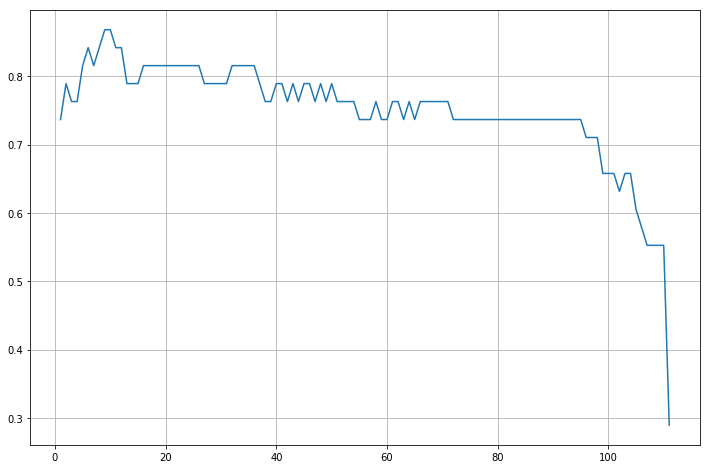

In [ ]:
test_accuracies = []
k_values = range(1,len(data_training)) 
for k in k_values:
    knn = KNN(n_neighbors=k)
    knn.fit(data_training.drop('C',axis=1), data_training.C)
    test_accuracies.append(knn.score(data_test.drop('C',axis=1), data_test.C))

best_index = np.argmax(test_accuracies)
best_k = k_values[best_index]
best_accuracy = test_accuracies[best_index]
print("Migliore accuracy di test: %0.2f" % best_accuracy)
print("Migliore k: %0.2f" % best_k)
    
plt.figure(figsize=(12,8))
plt.plot(k_values,test_accuracies)
plt.grid()
plt.show()

Abbiamo scoperto qual è il $K$ ottimale per il nostro dataset e qual è la migliore accuracy raggiungibile. Tuttavia, dobbiamo sempre ricordare che i dati di test non sono disponibili in fase di training, per cui **non dovremmo mai utilizzarli per scegliere i valori dei parametri**. Dunque possiamo scegliere il migliore $k$ solo utilizzando il training set. Ciò si può fare utilizzando l'oggetto GridSearchCV come visto nel caso di SVM:

In [ ]:
from sklearn.model_selection import GridSearchCV
#definiamo la griglia di parametri.
param_grid = [ {'n_neighbors':range(1,50)}]
#definiamo l'oggetto Grid Search
gs = GridSearchCV(KNN(), param_grid)
#avviamo la ricerca.
gs.fit(data_training.drop('C',axis=1), data_training.C)
best_knn = gs.best_estimator_
print("Migliore valore di K trovato utilizzando solo il training set: %d" % best_knn.n_neighbors)

Migliore valore di K trovato utilizzando solo il training set: 18


Il miglior valore di $K$ trovato in questa maniera può differire da quello trovato utilizzando il test set. Vediamo che accuracy di test otteniamo utilizzando il miglior modello trovato:

In [ ]:
print("Accuracy su test set con miglior K trovato sul training set: %0.2f" % \
        best_knn.score(data_test.drop('C',axis=1), data_test.C))

Accuracy su test set con miglior K trovato sul training set: 0.82


> **🙋‍♂️ Domanda 13**
>
> Perché dobbiamo utilizzare il training set per scegliere il migliore valore di $K$ e non possiamo semplicemente utilizzare il test set?

## Discriminante Lineare di Fisher

Siano $\{x_i\}_{i=1}^N$ un insieme di osservazioni $D$-dimensionali suddivise in due classi $C_1$ e $C_2$ in modo che $x_i \in C_1 \oplus x_i \in C_2$. Vogliamo trovare una trasformazione lineare dei dati in uno spazio monodimensionale:

$$y(\mathbf{x}) = \mathbf{w}^T \mathbf{x}$$

dove $\mathbf{x}$ è una osservazione $D$-dimensionale, $\mathbf{w}$ è un vettore $D$-dimensionale detto **vettore dei pesi** e $y(\mathbf{x})$ è la proiezione su una dimensione di $\mathbf{x}$ (dunque, $y(\mathbf{x})$ è uno scalare). Se la proiezione trovata massimizza la separabilità dei dati, non ci resta che trovare una soglia $y_0$ e classificare:

$$\mathbf{x} \ \text{ appartenente a }  C_1 \text{ se } y(\mathbf{x})\geq y_0$$
$$\mathbf{x} \ \text{appartenente a } C_2 \text{ se } y(\mathbf{x})<y_0$$

Vediamo prima come trovare i parametri $\mathbf{w}$ che massimizzino la separabilità dei dati proiettati. Consideriamo le medie dei dati appartenenti alle due classi:

$$\mathbf{m}_1 = \frac{1}{N_1} \sum_{x_i \in C_1} x_i, \ \ \ \ \ \ \ \ \mathbf{m}_2 = \frac{1}{N_2} \sum_{x_i \in C_2} x_i,$$

dove $N_1=|\{x_i\ |\ x_i \in C_1\}|$ è il numero di elementi appartenenti alla classe $C_1$ e $N_2=|\{x_i\ |\ x_i \in C_2\}|$ è il numero di elementi appartenenti alla classe $C_2$. La misura più semplice di separabilità tra le classi sarebbe la distanza tra le medie delle classi calcolate sui dati proiettati:

$$m_1 = \mathbf{w}^T\mathbf{m}_1, \ m_2 = \mathbf{w}^T\mathbf{m}_2$$
$$m_2 - m_1 = \mathbf{w}^T(\mathbf{m}_2-\mathbf{m}_1)$$

Per massimizzare la quantità $m_2-m_1$, inseriamo il vincolo che $\mathbf{w}$ sia un vettore unitario ($\mathbf{w}^T\mathbf{w}=1$). Introducendo un moltiplicatore di Lagrange, dobbiamo massimizzare:

$$\mathbf{w}^T (\mathbf{m}_2-\mathbf{m}_1) + \lambda (1-\mathbf{w}^T\mathbf{w})$$

Ponendo la derivata rispetto a $\mathbf{w}$ uguale a zero, vediamo che una soluzione è data da:

$$\mathbf{w}^* = \frac{\mathbf{m}_2-\mathbf{m}_1}{||\mathbf{m}_2-\mathbf{m}_1||}$$

Questa soluzione tuttavia non ci garantisce nulla sulla varianza dei dati all'interno di una singola classe, che va minimizzata per assicurare una maggiore separabilità. Consideriamo il seguente esempio:

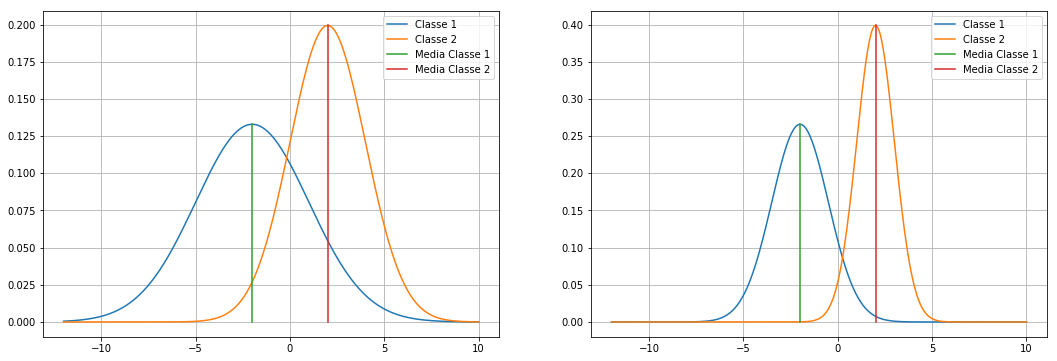

In [ ]:
from matplotlib import pyplot as plt
from scipy.stats import norm
import numpy as np
plt.figure(figsize=(18,6))
plt.subplot(121)
g1 = norm(-2,3)
g2 = norm(2,2)

x=np.linspace(-12,10,500)
plt.plot(x,g1.pdf(x))
plt.plot(x,g2.pdf(x))
plt.plot([-2,-2],[0,g1.pdf(-2)])
plt.plot([2,2],[0,g2.pdf(2)])
plt.legend(['Classe 1','Classe 2','Media Classe 1', 'Media Classe 2'])
plt.grid()

plt.subplot(122)
g3 = norm(-2,1.5)
g4 = norm(2,1)
plt.plot(x,g3.pdf(x))
plt.plot(x,g4.pdf(x))
plt.plot([-2,-2],[0,g3.pdf(-2)])
plt.plot([2,2],[0,g4.pdf(2)])
plt.legend(['Classe 1','Classe 2','Media Classe 1', 'Media Classe 2'])
plt.grid()
plt.show()

> **🙋‍♂️ Domanda 14**
>
> In entrambi i casi la differenza tra le medie è la stessa. Tuttavia i dati non sono separabili alla stessa maniera. Quale set di dati è "più separabile" tra i due? Perché?

> **🙋‍♂️ Domanda 15**
>
> Si faccia un esempio analogo (con disegno) a quello appena visto nel caso 2D.

Oltre a massimizzare la distanza tra le medie, vogliamo duqnue anche minimizzare le varianze dei dati appartenenti alle singole classi date da:

$$s_k^2 = \sum_{\mathbf{x}_i \in C_k} y(\mathbf{x}_i - m_k)^2,\ k=1,2$$

Per **massimizzare la distanza tra le medie trasformate** e **minimizzare le varianze dei dati trasformati**, viene definito il criterio di Fisher come segue:

$$J(\mathbf{w}) = \frac{(m_2-m_1)^2}{s_1^2+s_2^2}$$

Massimizzando $J(\mathbf{w})$ rispetto a $\mathbf{w}$, raggiungiamo entrambi gli obiettivi:
 * Massimizziamo $(m_2-m_1)$ che si trova al numeratore;
 * Minimizziamo $s_1^2+s_2^2$ che si trova al denominatore.
 
Il criterio di Fisher può essere riscritto in forma esplicita come dipendente da $\mathbf{w}$ come segue:

$$J(\mathbf{w}) = \frac{\mathbf{w}^T \mathbf{S}_B\mathbf{w}}{\mathbf{w}^T \mathbf{S}_W\mathbf{w}}$$

Dove $\mathbf{S}_B$ è la **between-class covariance matrix** (matrice di covarianza intra-classe) ed è data da:

$$\mathbf{S}_B = (\mathbf{m}_2-\mathbf{m}_1)(\mathbf{m}_2-\mathbf{m}_1)^T$$

e $\mathbf{S}_W$ è la **within-class covariance matrix** totale (matrice di covarianza inter-classe) ed è data da:

$$\mathbf{S}_W = \sum_{\mathbf{x}_i \in C_1}(\mathbf{x}_i-\mathbf{m}_1)(\mathbf{x}_i-\mathbf{m}_1)^T + \sum_{\mathbf{x}_i \in C_2}(\mathbf{x}_i-\mathbf{m}_2)(\mathbf{x}_i-\mathbf{m}_2)^T$$

La quantità $J(\mathbf{w})$ risulta essere massimizzata da:

$$\mathbf{w}\propto\mathbf{S}^{-1}_{W}(\mathbf{m_2}-\mathbf{m_1})$$

Per cui, una possibile soluzione è:

$$\mathbf{w}^* = \frac{\mathbf{S}^{-1}_{W}(\mathbf{m_2}-\mathbf{m_1})}{||\mathbf{S}^{-1}_{W}(\mathbf{m_2}-\mathbf{m_1})||}$$

Notiamo che se la matrice di covarianza inter-classe è diagonale, la soluzione trovata è equivalente a quella trovata massimizzando solo $\mathbf{m}_2-\mathbf{m}_1$.

Una volta trovata la proiezione ottimale $\mathbf{w}$ possiamo proiettare i dati mediante $y(\mathbf{x})=\mathbf{w}^T\mathbf{x}$. Dobbiamo dunque trovare la soglia $y_0$ per classificare i dati utilizzando il discriminante $y(x)\geq y_0$. La soglia ottimale $y_0$ può essere trovata modellando i dati delle due classi mediante due Gaussiane e trovando il punto in cui esse si intersecano.

### Esempio: Breast Cancer Dataset

Vediamo un esempio utilizzando come dataset il "Breast Cancer Wisconsin (Diagnostic) Database". Possiamo caricarlo tramile **scikit-learn**:

In [ ]:
from sklearn.datasets import load_breast_cancer
bcancer = load_breast_cancer()

Il dataset contiene 30 misurazioni derivate da campioni di masse estratte da seni. Ognuno di questo campione è classificato come "maligno" (classe 0) o "benigno" (classe 1). Le misurazioni sono contenute in `bcancer.data`, mentre le classi sono contenute in `bcancer.target`. Stampare `bcancer.DESCR` per visualizzare una descrizione del dataset. Consideriamo come feature solo le prime due features (raggio medio e tessitura media):

In [ ]:
X = bcancer.data[:,np.array([0,1])].T # features
C = bcancer.target #classi

Visualizziamo i dati in un plot 2D:

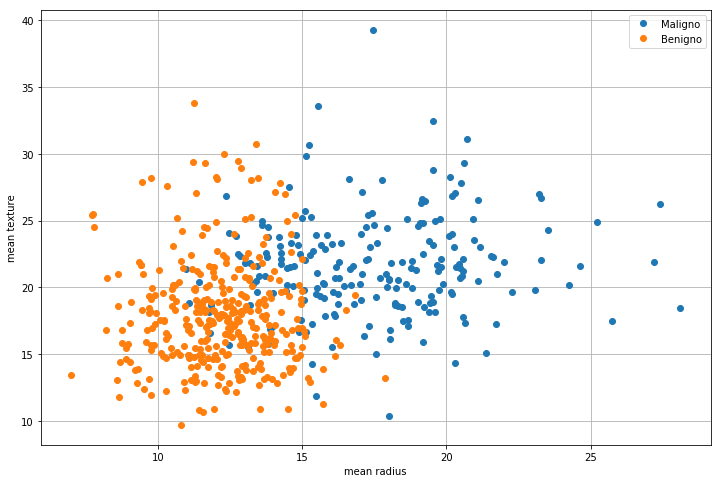

In [ ]:
plt.figure(figsize=(12,8))
for c in range(2):
    plt.plot(X[0,C==c],X[1,C==c],'o')
plt.legend(['Maligno','Benigno'])
plt.xlabel(bcancer.feature_names[0])
plt.ylabel(bcancer.feature_names[1])
plt.grid()
plt.show()

Calcoliamo le medie relative alle due classi e visualizziamole nel plot:

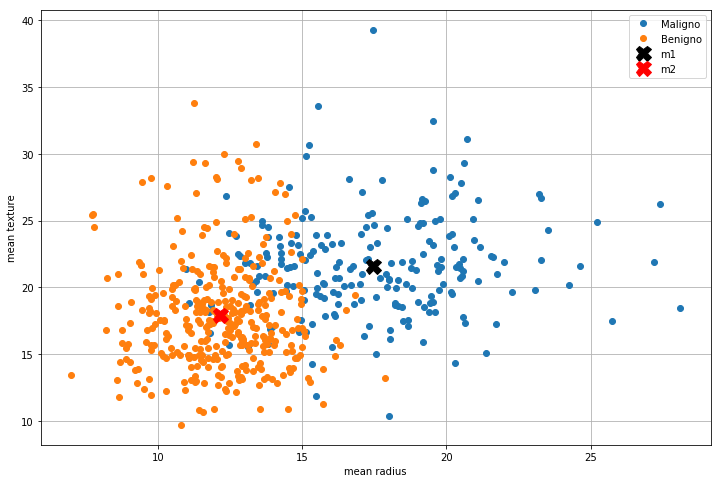

In [ ]:
m1 = X[:,C==0].mean(1)
m2 = X[:,C==1].mean(1)

plt.figure(figsize=(12,8))
for c in range(2):
    plt.plot(X[0,C==c],X[1,C==c],'o')
plt.xlabel(bcancer.feature_names[0])
plt.ylabel(bcancer.feature_names[1])
plt.plot(m1[0],m1[1],'Xk',markersize=15)
plt.plot(m2[0],m2[1],'Xr',markersize=15)
plt.legend(['Maligno','Benigno','m1','m2'])
plt.grid()
plt.show()

Calcoliamo ora la matrice $\mathbf{S}_W$:

In [ ]:
SW = np.cov(X[:,C==0]) + np.cov(X[:,C==1])

La soluzione secondo il criterio di Fisher è:

In [ ]:
from scipy.linalg import inv
w = inv(SW).dot((m2-m1))
w=w/np.sqrt((w**2).sum())
print(w)

[-0.96270156 -0.27056552]


Proiettiamo i dati utilizzando il vettore $\mathbf{w}$ appena trovato:

In [ ]:
Y=w.T.dot(X)
print(Y.shape) #adesso i dati sono unidimensionali

(569,)


Per visualizzare come i dati si dispongono nel nuovo spazio, visualizziamo i due relativi istogrammi:

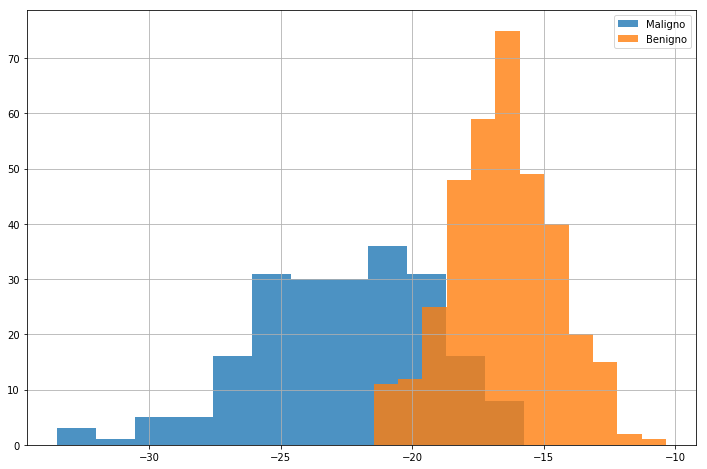

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(Y[C==0],alpha=0.8,bins=12)
plt.hist(Y[C==1],alpha=0.8,bins=12)
plt.legend(['Maligno','Benigno'])
plt.grid()
plt.show()

Ora che i dati sono unidimensionali, possiamo provare a classificarli con una soglia. Utilizziamo il criterio MAP per trovare quella ottimale. Facciamo fit di due Gaussiane:

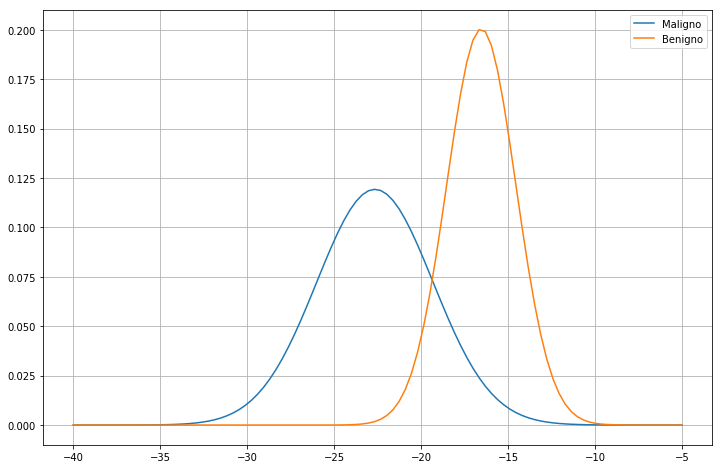

In [ ]:
from scipy.stats import norm
g0 = norm(*norm.fit(Y[C==0]))
g1 = norm(*norm.fit(Y[C==1]))

x=np.linspace(-40,-5,100)

plt.figure(figsize=(12,8))
plt.plot(x,g0.pdf(x))
plt.plot(x,g1.pdf(x))
plt.legend(['Maligno','Benigno'])
plt.grid()
plt.show()

Come abbiamo già visto, la soglia ottimale è data dal punto in cui si intersecano le due Gaussiane. Utilizziamo il metodo visto in precedenza per farlo:

In [ ]:
def risolvi(mu_1,mu_2,sigma_1,sigma_2):
    a = 1.0/(2*sigma_1**2) - 1.0/(2*sigma_2**2)
    b = mu_2/(sigma_2**2) - mu_1/(sigma_1**2)
    c = mu_1**2 /(2*sigma_1**2) - mu_2**2 / (2*sigma_2**2) - np.log(sigma_2/sigma_1)
    return np.roots([a,b,c])

solutions = risolvi(g0.mean(),g1.mean(),g0.std(), g1.std())
print (solutions)

[-19.36113911  -7.01507854]


Scartiamo la seconda soluzione (in quel punto le Gaussiane sono quasi entrambe nulle) e teniamo la prima come soglia ottimale $y_0$:

In [ ]:
y0=solutions[0]

Possiamo dunque classificare i dati mediante la regola $y(\mathbf{x})\geq y_0$:

In [ ]:
predictions = Y>=y0;

Calcoliamo l'accuracy del classificatore appena costruito:

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(C,predictions))

0.8910369068541301


### Interpretazione geometrica dei coefficienti

Mettendo insieme la proiezione LDA e la classificazione mediante soglia $y(\mathbf{x})$, abbiamo costruito il **discriminante lineare**:

$$z(\mathbf{x}) = \mathbf{w}^T \mathbf{x} + w_0$$

dove $w_0=-y_0$. Utilizzando il discriminante, possiamo classificare i dati come segue:

$$\mathbf{x}\ \text{ appartenente a } C_1  \text{ se } z(\mathbf{x})\geq 0$$
$$\mathbf{x}\ \text{ appartenente a } C_2  \text{ se } z(\mathbf{x})< 0$$

Questo schema di classificazione è del tutto equivalente a quello visto in precedenza, ma questo modo di vedere le cose ci permette di fare alcune considerazioni geometriche.

Il classificatore lineare separa i dati nel loro spazio di appartenenza $D$-dimensionale mediante un iperpiano $D-1$ dimensionale definito dalla formula $z(\mathbf{x})=0$. Questo iperpiano di separazione è in genere detto "decision boundary". Ad esempio, se i dati sono bidimensionali, il discriminante può essere espresso come $z((x,y)) = w_1 x + w_2 y + w_0$ e l'iperpiano che separa i dati è la retta di equazione $w_1 x + w_2 y + w_0=0$ o, in forma esplicita $y=-\frac{w_1}{w_2}x-\frac{w_0}{w_2}$ Proviamo a graficarla nel caso del nostro esempio:

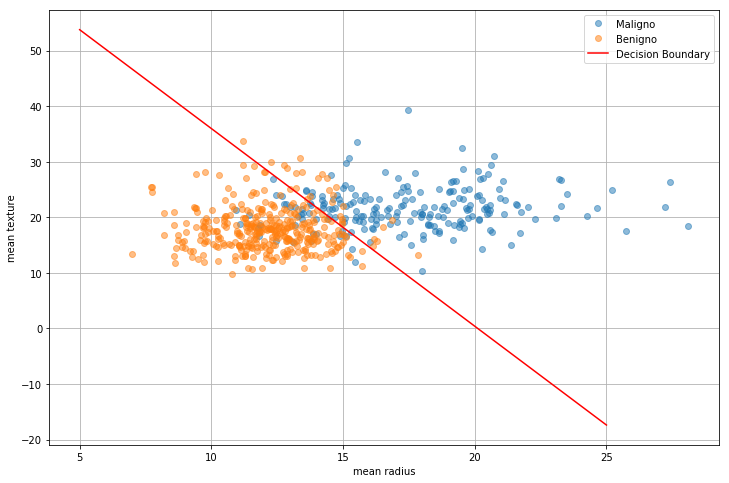

In [ ]:
plt.figure(figsize=(12,8))
for c in range(2):
    plt.plot(X[0,C==c],X[1,C==c],'o',alpha=0.5)
plt.xlabel(bcancer.feature_names[0])
plt.ylabel(bcancer.feature_names[1])
x1 = 5; x2 = 25;
y1 = -w[0]/w[1]*x1+y0/w[1]
y2 = -w[0]/w[1]*x2+y0/w[1]
plt.plot([x1,x2],[y1,y2],'r')
plt.legend(['Maligno','Benigno','Decision Boundary'])
plt.grid()
plt.show()

In generale, siano $\mathbf{x}_A$ e $\mathbf{x}_B$ due punti distinti che si trovano sul decision boundary. Si ha:

$$z(\mathbf{x}_A)=z(\mathbf{x}_B)=0 \Rightarrow \mathbf{w}^T(\mathbf{x}_A-\mathbf{x}_B)=0$$

da cui evinciamo che **il vettore w è ortogonale all'iperpiano che separa i dati (il decision bounday)**. Inoltre, la distanza tra l'iperpiano e l'origine è data da:

$$\frac{|\mathbf{w}^T \mathbf{0}+w_0|}{||\mathbf{w}||} = \frac{|w_0|}{||\mathbf{w}||}$$

Non dobbiamo inoltre dimenticare che, dato che proiettiamo i dati mediante l'espressione $z(\mathbf{x})=\mathbf{w}^Tx$, $\mathbf{w}$ rappresenta la direzione lungo la quale i dati saranno proiettati.

Possiamo dunque interpretare i parametri trovati come segue:
 * $\mathbf{w}$ indica la direzione lungo la quale i dati verranno proiettati ed è **ortogonale** al decision bounday;
 * $w_0$ indica la distanza tra l'origine e il decision boundary secondo la formula $\frac{|w_0|}{||\mathbf{w}||}$
 
Vediamo di graficare il vettore $\mathbf{w}$:

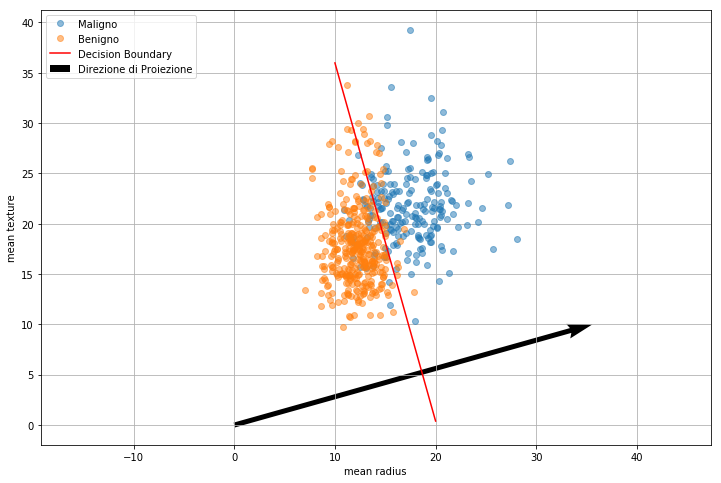

In [ ]:
plt.figure(figsize=(12,8))
for c in range(2):
    plt.plot(X[0,C==c],X[1,C==c],'o',alpha=0.5)
plt.xlabel(bcancer.feature_names[0])
plt.ylabel(bcancer.feature_names[1])
x1 = 10; x2 = 20;
y1 = -w[0]/w[1]*x1+y0/w[1]
y2 = -w[0]/w[1]*x2+y0/w[1]
plt.plot([x1,x2],[y1,y2],'r')
plt.quiver(0,0,-w[0],-w[1],scale=1.8)
plt.axis('equal')
plt.legend(['Maligno','Benigno','Decision Boundary','Direzione di Proiezione'],loc=2)
plt.grid()
plt.show()

> **🙋‍♂️ Domanda 16**
>
> Calcolare il valore $\frac{|w_0|}{||\mathbf{w}||}$ e segnare sul grafico sopra a quale segmento corrisponde questa lunghezza. Il valore ottenuto è verosimile?

> **🙋‍♂️ Domanda 17**
>
> Si considerino altre possibili direzioni di proiezioni dei dati. Esse permettono una maggiore separabilità dei dati?

## Linear Discriminant Analysis

Scikit-Learn contiene una implementazione ottimizzata della LDA. Vediamo come utilizzarla:

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
lda.fit(X.T,bcancer.target)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

Una volta allenato il modello, possiamo effettuare direttamente le predizioni come segue:

In [ ]:
preds=lda.predict(X.T)

Possiamo anche ottenere l'accuracy del modello come segue:

In [ ]:
lda.score(X.T,bcancer.target)

0.8857644991212654

Vediamo come accedere ad alcuni dei parametri interni:

In [ ]:
print("Coefficienti della LDA (w)",lda.coef_)
print("Valore soglia (w_0)",lda.intercept_)
print("Medie dei valori in ingresso\n",lda.means_)

Coefficienti della LDA (w) [[-0.90292832 -0.2221124 ]]
Valore soglia (w_0) [18.27761577]
Medie dei valori in ingresso
 [[17.46283019 21.60490566]
 [12.14652381 17.9147619 ]]


> **🙋‍♂️ Domanda 18**
>
> Si confrontino i risultati ottenuti mediante l'implementazione di scikit-learn con quelli ottenuti prima in maniera manuale. I due classificatori sono simili o equivalenti?

Visualizziamo il decision boundary per un semplice problema di classificazione con LDA:

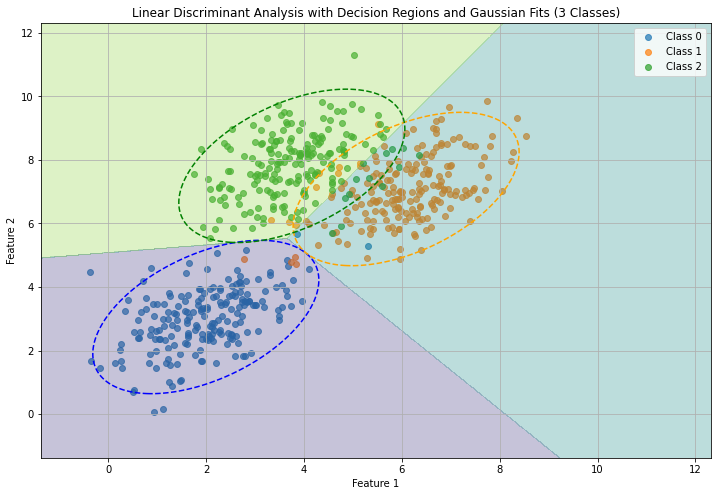

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal

# Generate synthetic data with two predictors and three classes
np.random.seed(42)

mean_class0 = [2, 3]
mean_class1 = [6, 7]
mean_class2 = [4, 8]
cov_matrix = [[1, 0.5], [0.5, 1]]

num_samples = 200

class0_samples = np.random.multivariate_normal(mean_class0, cov_matrix, num_samples)
class1_samples = np.random.multivariate_normal(mean_class1, cov_matrix, num_samples)
class2_samples = np.random.multivariate_normal(mean_class2, cov_matrix, num_samples)

X = np.concatenate((class0_samples, class1_samples, class2_samples))
y = np.concatenate((np.zeros(num_samples), np.ones(num_samples), 2 * np.ones(num_samples)))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(store_covariance=True)
lda.fit(X_train, y_train)

# Generate a meshgrid for visualization
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
m1 = np.min([x_min, y_min])
m2 = np.max([x_max, y_max])
xx, yy = np.meshgrid(np.arange(m1, m2, 0.01), np.arange(m1, m2, 0.01))

# Predict the class for each point in the meshgrid
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the data, decision regions, and Gaussian fits
plt.figure(figsize=(12, 8))

# Plot the samples for each class
plt.scatter(class0_samples[:, 0], class0_samples[:, 1], label='Class 0', alpha=0.7)
plt.scatter(class1_samples[:, 0], class1_samples[:, 1], label='Class 1', alpha=0.7)
plt.scatter(class2_samples[:, 0], class2_samples[:, 1], label='Class 2', alpha=0.7)

# Plot the decision regions
plt.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(4) - 0.5, cmap='viridis')

# Fit Gaussian distributions to each class
class0_gaussian = multivariate_normal(mean=lda.means_[0], cov=lda.covariance_)
class1_gaussian = multivariate_normal(mean=lda.means_[1], cov=lda.covariance_)
class2_gaussian = multivariate_normal(mean=lda.means_[2], cov=lda.covariance_)

# Plot the Gaussian fits
plt.contour(xx, yy, class0_gaussian.pdf(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape), levels=[0.01], colors='blue', linestyles='dashed')
plt.contour(xx, yy, class1_gaussian.pdf(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape), levels=[0.01], colors='orange', linestyles='dashed')
plt.contour(xx, yy, class2_gaussian.pdf(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape), levels=[0.01], colors='green', linestyles='dashed')

plt.title('Linear Discriminant Analysis with Decision Regions and Gaussian Fits (3 Classes)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


### Riduzione della Dimensionalità con LDA

La LDA può essere utlizzata anche per riduzioene della dimensionalità. In questo caso, i dati verranno proiettati in uno spazio $K-1$ dimensionale, dove $K$ è il numero totale di classi. La proiezione viene sempre effettuata in maniera tale da garantire la separabilità della classi. In generale dunque, l'analisi LDA troverà una matrice di pesi $W$ di dimensione $D \times K-1$ che permetta di trasformare i dati in una nuova matrice $Y$ di dimensione $K-1 \times N$:

$$Y=W^T X$$

I nuovi dati possono essere utilizzati per allenare successivamente un classificatore. Consideriamo ad esempio il dataset degli iris di Fisher:

In [ ]:
from statsmodels.datasets import get_rdataset
iris = get_rdataset('iris')
iris.data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Il dataset contiene quattro features e tre classi. Utilizzando la tecnica LDA possiamo proiettare i dati in uno spazio bidimensionale nel quale le classi risultino massimamente separate:

In [ ]:
lda = LDA()
lda.fit(iris.data.drop('Species',axis=1),iris.data.Species)
iris_lda=lda.transform(iris.data.drop('Species',axis=1))
print(iris_lda.shape)

(150, 2)


Abbiamo così proiettato i dati su due dimensioni. Proviamo a plottare i dati classe per classe:

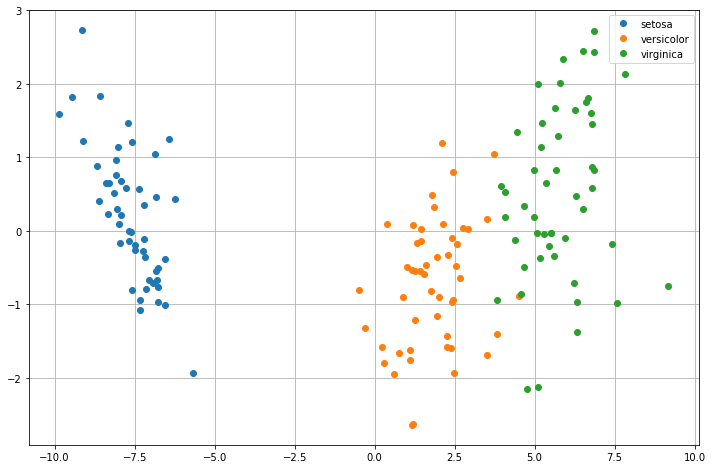

In [ ]:
plt.figure(figsize=(12,8))
#otteniamo le tre classi uniche dal dataset
classes = np.unique(iris.data['Species'])
for s in classes:
    class_data = iris_lda[iris.data['Species']==s]
    plt.plot(class_data[:,0],class_data[:,1],'o')
plt.grid()
plt.legend(classes)
plt.show()

Le classi sono adesso linearmente separabili. Possiamo provare ad allenare un classificatore Naive Bayes Gaussiano a partire da queste features:

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(iris_lda,iris.data.Species)
print("Accuracy: %0.2f" % model.score(iris_lda,iris.data.Species))

Accuracy: 0.98


## Classificazione Maximum a Posteriori (MAP)

Abbiamo visto come costruire un classificatore che, mediante la selezione di una opportuna soglia, ci permetta di predire il sesso di un soggetto in base alla sua altezza. Vediamo adesso come implementare un classificatore Maximum a Posteriori per raggiungere lo stesso scopo. Consideriamo le variabili aleatorie $S$ rappresentante il sesso dei soggetti presenti nel dataset (può assumere i valori M o F) e $H$ rappresentante l'altezza dei soggetti. Il nostro obiettivo è scegliere il valore di $S$ più probabile sapendo che $H$ assume un dato valore $h$ (es. $h=175\ cm$). Secondo il principio MAP, sceglieremo la classe $s$ che massimizza l'espressione:

$$P(S=s\ |\ H=h)$$

Ciò si scrive formalmente come segue:

$$s^* = \arg\max_s P(S=s\ |H=h)$$

dove $s^*$ è la classe predetta. Dato che $S$ può assumere solo due valori, $M$ o $F$, non resta che calcolare:

$$P(S=M\ |\ H=h)$$
$$P(S=F\ |\ H=h)$$

e scegliere la classe per la quale la probabilità a posteriori è maggiore. Ricordiamo che secondo la regola di Bayes:

$$P(S\ |\ H=h) = \frac{P(H=h \ | \ S)\ P(S)}{P(H=h)}$$

Per entrambe le probabilità $P(S=M\ |\ H=h)$ e $P(S=F\ |\ H=h)$, il termine $P(H=h)$ è identico. Dato che il nostro scopo è quello di confrontare le due quantità possiamo ometterlo. Dobbiamo dunque confrontare le seguenti quantità:

$$P(H=h\ |\ S=M) P(S=M)$$
$$P(H=h\ |\ S=F) P(S=F)$$

In pratica, spesso si assumono probabilità a priori identiche ($P(S=M)=P(S=F)=\frac{1}{2}$). In tal caso il nostro classificatore può essere espresso così:

$$s^* = \begin{cases}
M &se& P(H=h\ |\ S=M) \geq P(H=h\ |\ S=F) \\
F &altrimenti &
\end{cases}$$

Dobbiamo dunque trovare un modo per **rappresentare la verosimiglianza** $P(H\ | \ S)$ in modo da poterne calcolare i valori per ogni valore di $H$ e di $S$. Osservando che $S$ può assumere solo due valori, possiamo rappresentare due funzioni di $H$ distinte:

$$P(H\ |\ S=M)$$
$$P(H\ |\ S=F)$$

Secondo i principi della probabilità Bayesiana, queste due probabilità possono essere modellate sulla base delle nostre **credenze** (**assunzioni**) sui dati. In particolare, ci siamo già "convinti" in passato che $H$ si distribuisce **approssimativamente** secondo una Gaussiana. Possiamo dunque modellare le due probabilità viste con due Gaussiane:

$$P(H=h\ |\ S=M) = G(h; \mu_M,\sigma_M^2)$$
$$P(H=h\ |\ S=F) = G(h; \mu_F,\sigma_F^2)$$

Dove $\mu_M$ e $\mu_F$ sono le medie stimate dai due campioni di altezze maschili e femminili mentre $\sigma_M^2$ e $\sigma_F^2$ sono le due varianze stimate dai campioni.

Una volta definite le due Gaussiane, il nostro classificatore diventa:

$$s^* = \begin{cases}
M &se& G(h; \mu_M,\sigma_M^2) \geq G(h; \mu_F,\sigma_F^2) \\
F &altrimenti &
\end{cases}$$

Vediamo ora di tradurre tutto in termini computazionali e di implementare il nostro classificatore **MAP** con assunzione di Gaussianità delle altezze. Utilizzeremo nuovamente il dataset di pesi e altezze:

In [ ]:
import pandas as pd
import numpy as np
data=pd.read_csv('http://iplab.dmi.unict.it/furnari/downloads/height_weight.csv')
data.head()

,sex,BMI,height,weight
0,M,33.36,187.96,117.933920
1,M,26.54,177.80,83.914520
2,F,32.13,154.94,77.110640
3,M,26.62,172.72,79.378600
4,F,27.13,167.64,76.203456


Suddividiamo l'insieme in training e test set utilizzando il $25\%$ dei dati come test set e il restante $75\%$ come training set:

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(1234)
data_train, data_test = train_test_split(data, test_size=0.25)

Effettuiamo dunque il fitting di due Gaussiane sui dati delle altezze maschili e femminili:

In [ ]:
from scipy.stats import norm

#la notazione sotto è una notazione compatta
#per definire una distribuzione normale e fittarla sui dati

#costruiamo due distribuzioni normali separate per i due set di dati
g_m = norm(*norm.fit(data_train[data_train['sex']=='M']['height']))
g_f = norm(*norm.fit(data_train[data_train['sex']=='F']['height']))

Plottiamo dunque le due Gaussiane considerando un range di valori $x$ comune:

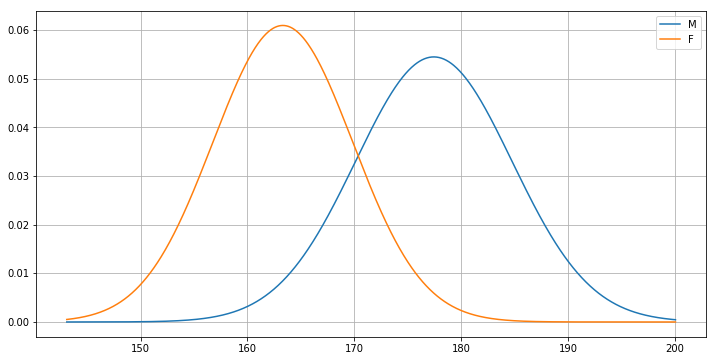

In [ ]:
from matplotlib import pyplot as plt

x = np.linspace(g_f.ppf(0.001), g_m.ppf(0.999),1000)

plt.figure(figsize=(12,6))
plt.plot(x,g_m.pdf(x))
plt.plot(x,g_f.pdf(x))
plt.legend(['M','F'])
plt.grid()
plt.show()

> **🙋‍♂️ Domanda 19**
>
> Cosa ci dice il plot? Sapendo che un individuo è alto 160 cm, è più probabile che sia una donna o un uomo? Cosa possiamo dire di un individuo alto 180 cm? E di un individuo alto 170 cm? Esiste un punto soglia al di là del quale conviene classificare le altezze come "uomini"?

Calcoliamo dunque le probabilità $P(H\ |\ S)$ per tutti i valori del test set:

In [ ]:
prob_m = g_m.pdf(data_test['height'])
prob_f = g_f.pdf(data_test['height'])

A questo punto costruiamo un vettore `pred_male` che contenga `True` se pensiamo che il soggetto sia un uomo, e dunque se `prob_m` è maggiore di `prob_f`:

In [ ]:
pred_male = prob_m>=prob_f

Calcoliamo FPR, TPR e accuracy del classificatore:

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
male_gt = data_test['sex']=='M'
acc = accuracy_score(male_gt, pred_male)
cm = confusion_matrix(male_gt, pred_male)
cm=cm/cm.sum(1).reshape(-1,1)
_, fpr, _, tpr = cm.ravel()
print("False Positive Rate: {:0.2f}".format(fpr))
print("True Positive Rate: {:0.2f}".format(tpr))
print("Accuracy: {:0.2f}".format(acc))

False Positive Rate: 0.12
True Positive Rate: 0.81
Accuracy: 0.85


Abbiamo visto come l'approccio MAP ci permetta di definire un classificatore senza la necessità di definire una soglia. In pratica, il criterio MAP identifica un punto (una soglia) nello spazio dei valori di $H$ **oltre il quale** è più conveniente predire "M" piuttosto che "F". 

Tale punto è quello in cui le due Gaussiane si intersecano e si trova (a occhio) intorno a 170cm. Per tutti i valori superiori a tale valore soglia, la Gaussiana relativa a "M" darà sempre valori maggiori di quelli della Gaussiana relativa a "F" e viceversa, al di sotto del valore soglia, la Gaussiana relativa a "F" darà valori superiori a quelli della Gaussiana relativa a "M". Se volessimo trovare il valore soglia analiticamente, dovremmo risolvere l'equazione:

$$G_M(x)=G_F(x)$$

nella variabile $x$. Tale equazione si riconduce alla forma:

$ax^2 + bx + c=0$

con:

 * $a = \frac{1}{2\sigma_1^2} - \frac{1}{2\sigma_2^2}$;
 * $b = \frac{\mu_2}{\sigma_2^2} - \frac{\mu_1}{\sigma_1^2}$;
 * $c = \frac{m_1^2}{2 \sigma_1^2} - \frac{m_2^2}{2 \sigma_2^2} - \log\frac{\sigma_2}{\sigma_1}$.

Possiamo risolvere l'equazione mediante il metodo **roots** di **numpy**:

In [ ]:
#Una funzione per risolvere l'equazione vista sopra
def risolvi(mu_1,mu_2,sigma_1,sigma_2):
    a = 1.0/(2*sigma_1**2) - 1.0/(2*sigma_2**2)
    b = mu_2/(sigma_2**2) - mu_1/(sigma_1**2)
    c = mu_1**2 /(2*sigma_1**2) - mu_2**2 / (2*sigma_2**2) - np.log(sigma_2/sigma_1)
    return np.roots([a,b,c])

solutions = risolvi(g_m.mean(),g_f.mean(),g_m.std(), g_f.std())
print(solutions)

[170.35818328  43.85968878]


L'equazione ha due soluzioni. La prima è il punto in cui le Gaussiane si intersecano al centro del grafico, mentre la seconda è relativa a un punto in cui le Gaussine si interseacano a sinistra (non visibile nel grafico). Plottiamo la posizione in cui cade la prima delle due soluzioni:

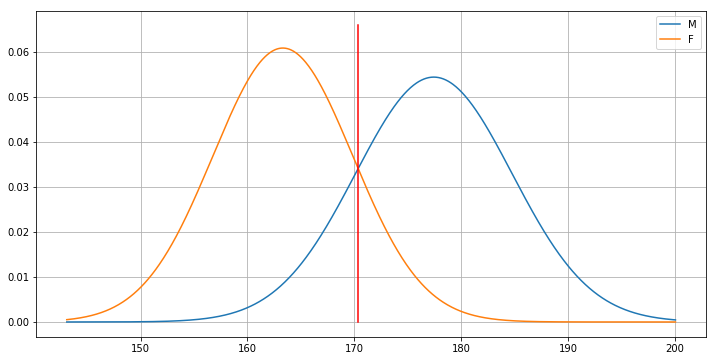

In [ ]:
x = np.linspace(g_f.ppf(0.001), g_m.ppf(0.999),1000)

plt.figure(figsize=(12,6))
plt.plot(x,g_m.pdf(x))
plt.plot(x,g_f.pdf(x))
plt.legend(['M','F'])
plt.plot([solutions[0],solutions[0]],[0,0.066],'r')
plt.grid()
plt.show()

In pratica il calssificatore **MAP** è equivalente (o quasi, vista la presenza di due soluzioni) a un classificatore basato su soglia per il quale la soglia ottimale è stata determinata automaticamente. Va notato che il calssificatore MAP trovato è molto simile a un classificatore basato su soglia anche dal momento che poche altezze saranno inferiori a $50\ cm$ (il secondo punto di intersezione tra le Gaussiane).

> **🙋‍♂️ Domanda 20**
>
> Confrontare la soglia con quella trovata mediante il metodo di ottimizzazione visto nella Sezione 1. Le due soglie sono simili? A che cosa è dovuta la differenza tra le due soglie?

### Classificatore Basato su Distanza di Mahalanobis

Un altro metodo di classificazione consiste nel misurare la distanza dell'elemento $h$ da classificare rispetto alle due popolazioni alle quali esso può appartenere. Tale misura di distanza viene ottenuta mediante la **distanza di Mahalanobis**. La distanza di **Mahalanobis** tra un vettore $\mathbf x = (x_1, \ldots, x_n)^T$ multivariato e un gruppo di valori di valor medio $\mathbf \mu = (\mu_1, \ldots, \mu_n)^T$ e matrice di covarianza $\Sigma$ si definisce come:

$$D_M(\mathbf{x}) = \sqrt{(\mathbf{x}-\mathbf{\mu})^T \Sigma^{-1}(\mathbf{x}-\mathbf{\mu})}$$

Considerando la matrice di covarianza, la distanza di **Mahalanobis** tiene conto della correlazione che sussiste tra le variabili del gruppo di valori considerato. 

Nel caso di un campione **monovariato** $x$ e di un gruppo di valori di media $\mu$ e varianza $\sigma^2$, la distanza di Mahalanobis resta definita come segue:

$$D_M(x) = \sqrt{(\frac{x-\mu}{\sigma})^2}$$

Una interpretazione della distanza di Mahalanobis nel caso monovariato è che essa misura lo scostamento di un valore dalla media di un campione in termini di deviazioni standard $\sigma$. Ciò permette di pesare le distanze da campioni **più dispersi** in maniera minore rispetto alle distanze da campioni **meno dispersi**. 

Vediamo un esempio. Consideriamo due popolazioni normali di media e varianza $\mu_1=-5, \mu_2=3, \sigma_1=3, \sigma_2=1$. Consideriamo inoltre il punto $x=0$:

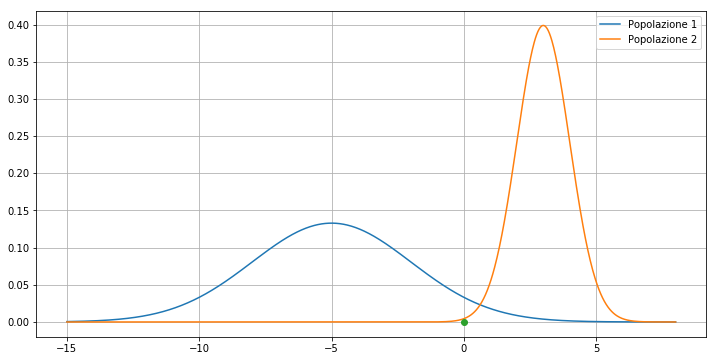

In [ ]:
mu_1=-5
mu_2=3
sigma_1=3
sigma_2=1

g1 = norm(mu_1,sigma_1)
g2 = norm(mu_2,sigma_2)

x=0
plt.figure(figsize=(12,6))
dom=np.linspace(-15,8,1000)
plt.plot(dom,g1.pdf(dom))
plt.plot(dom,g2.pdf(dom))

plt.plot(x,'o')
plt.grid()
plt.legend(['Popolazione 1', 'Popolazione 2'])
plt.show()

> **🙋‍♂️ Domanda 21**
>
> A quale delle due popolazioni appartiene il punto? Qual è un buon criterio per determinarlo?

Ci chiediamo dunque a quale popolazione appartenga il punto $x1$. Iniziamo calcolando la distanza euclidea tra il punto e le medie delle due popolazioni:

In [ ]:
dist_1 = (x-mu_1)**2
dist_2 = (x-mu_2)**2

print("Distanza dalla media della prima popolazione:",dist_1)
print("Distanza dalla media della seconda popolazione:",dist_2)

Distanza dalla media della prima popolazione: 25
Distanza dalla media della seconda popolazione: 9


Il punto è più vicino alla media della seconda popolazione, il che potrebbe portarci a concludere che esso appartiene ad essa. Tuttavia, se calcoliamo le probabilità:

$$P(x\ |\ Popolazione = 1) = G(x;\mu_1,\sigma_1)$$
$$P(x\ |\ Popolazione = 2) = G(x;\mu_2,\sigma_2)$$

scopriamo che:

$$P(x\ |\ Popolazione=1) > P(x\ |\ Popolazione = 2)$$

Vediamolo in termini computazionali:

In [ ]:
print("Probabilità P(x | Popolazione = 1)=",g1.pdf(x))
print("Probabilità P(x | Popolazione = 2)=",g2.pdf(x))

Probabilità P(x | Popolazione = 1)= 0.03315904626424956
Probabilità P(x | Popolazione = 2)= 0.0044318484119380075


Dunque, per il criterio MAP, la nostra conclusione (ovvero che il punto appartiene alla seconda popolazione) è errata! Ciò nasce dall'aver ignorato il fatto che le due popolazioni hanno varianze diverse. Se invece delle distanze Euclidee calcoliamo le distanze di Mahalanobis e confrontiamo i loro valori assoluti, otteniamo:

In [ ]:
mx_p1 = float(x-mu_1)/sigma_1
mx_p2 = float(x-mu_2)/sigma_2

print(abs(mx_p1),abs(mx_p2))

1.6666666666666667 3.0


Il punto è più vicino alla prima popolazione e dunque va classificato come tale!

Torniamo al caso del classificatore basato sulle altezze. Considerate le due popolazioni Gaussiane, possiamo calcolare le distanze di Mahalanobis di un dato valore $h$ rispetto alle due popolazioni. Il valore $h$ verrà classificato come appartenente alla popolazione dalla quale si è misurata una distanza (in valore assoluto) minore. Vediamolo in termini computazionali:

In [ ]:
#calcoliamo le distanze per i dati di test
#utilizzando media e varianza calcoalte sul training set
dist_male = (data_test.height-g_m.mean())/g_m.std()
dist_female = (data_test.height-g_f.mean())/g_f.std()

Adesso classifichiamo come uomini tutti i casi in cui la distanza dalla popolazione degli uomini è in valore assoluto minore della distanza dalla popolazione delle donne:

In [ ]:
pred_male=np.abs(dist_male)<npw.abs(dist_female)

Calcoliamo l'accuracy del nuovo classificatore:

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
acc = accuracy_score(male_gt, pred_male)
cm = confusion_matrix(male_gt, pred_male)
cm=cm/cm.sum(1).reshape(-1,1)
_, fpr, _, tpr = cm.ravel()
print("False Positive Rate: {:0.2f}".format(fpr))
print("True Positive Rate: {:0.2f}".format(tpr))
print("Accuracy: {:0.2f}".format(acc))

False Positive Rate: 0.20
True Positive Rate: 0.88
Accuracy: 0.83


> **🙋‍♂️ Domanda 22**
>
> Si confronti la matrice di confusione del classificatore basato sulla distanza di Mahalanobis con quella relativa al classificatore MAP precedentemente allenato. I due metodi sono equivalenti?

## Naive Bayes

Abbiamo visto come il principio MAP ci permette di costruire un semplice classificatore basato sull'osservazione dei valori di una variabile casuale. Spesso però può capitare che la classe di appartenenza di un determinato elemento possa dipendere dai valori di più variabili casuali. Consideriamo ad esempio le variabili aletaorie:
 
 * $S$ indica il sesso e può assumere come valori "M" o "F";
 * $H$ indica l'altezza del soggetto;
 * $W$ indica il peso del soggetto;

Se volessimo classificare i soggetti sulla base dei valori delle due variabili $H$ e $B$, per il principio MAP dovremmo trovare il valore di $S$ che massimizza la probabilità a posteriori:

$$P(S\ |\ H,W) = \frac{P(H,W\ |\ S)\ P(S)}{P(H,W)}$$

Dato che vogliamo massimizzare la probabilità a posteriori, possiamo tralasciare il denominatore e scrivere:

$$s^* = \arg\max_s P(S = s\ |\ H,W) = \arg\max_s P(H,W\ |\ S = s) P(S = s)$$

L'espressione da massimizzare corrisponde alla distribuzione congiunta di $H$ e $W$ dato $S$. Coinvolgendo più variabili aleatorie, questa probabilità è difficile da modellare. 

Cerchiamo dunque di "manopolare" l'espressione vista sopra per semplificare il problema. Possiamo sviluppare l'espressione come segue:

$$P(H,W\ |\ S) P(S) =  P(H,W,S) = P(H\ |\ W,S)\ P(W,S) = P(H\ |\ W,S)\ P(W\ |\ S)\ P(S)$$

Un classificatore Naive Bayes fa a questo punto l'assunzione (naive per l'appunto) che le variabili $H$ e $W$ siano **condizionalmente indipendenti l'una rispetto all'altra data la classe S**, ovvero che:

$$H \perp\!\!\!\perp W\ |\ S$$

Va notato che l'assunzione è **davvero Naive** in quanto assume che **una volta nota la classe di appartenenza, il valore di B non ci dice nulla sul valore di H e, viceversa, il valore di H non ci dice nulla sul valore B**. Ciò implicherebbe che, considerato l'insieme delle donne ($S$ noto), allora a un valore di $H$ ad esempio pari a $150 cm$ può corrispondere un qualsiasi valore di $W$ . In realtà sappiamo che questa condizione è spesso falsa (le variabili che rappresentano diversi aspetti di un fenomeno tendono a influenzarsi). Nonostante tale assunzione, i classificatori Naive Bayes restano uno strumento molto potente in grado di gestire con facilità un grosso numero di variabili indipendenti.

L'indipendenza condizionale tra $H$ e $W$ implica che:

$$P(H\ |\ W,S) = P(H\ |\ S)$$

da cui otteniamo:

$$P(H,W\ |\ S) P(S) = P(H\ |\ W,S)\ P(W\ |\ S)\ P(S) = P(H\ |\ S)\ P(W\ |\ S)\ P(S)$$

Assumendo nuovamente la distribuzione a priori sui sessi uniforme ($P(s)=0.5$), la nostra ottimizzazione diventa:

$$s^* = \arg\max_s P(H\ |\ S = s)\ P(W\ |\ S = s)$$

Possiamo modellare le distribuzioni $P(H\ |\ S=s)$ e $P(W\ |\ S=s)$ con quattro Gaussiane (due per ogni variabile, una per sesso):

In [ ]:
g_m_h = norm(*norm.fit(data_train[data_train['sex']=='M']['height']))
g_f_h = norm(*norm.fit(data_train[data_train['sex']=='F']['height']))
g_m_w = norm(*norm.fit(data_train[data_train['sex']=='M']['weight']))
g_f_w = norm(*norm.fit(data_train[data_train['sex']=='F']['weight']))

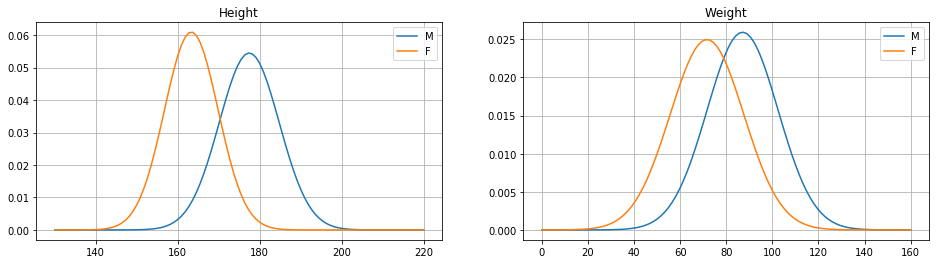

In [ ]:
plt.figure(figsize=(16,4))
dom=np.linspace(130,220,100)
plt.subplot(121)
plt.plot(dom,g_m_h.pdf(dom))
plt.plot(dom,g_f_h.pdf(dom))
plt.grid()
plt.title('Height')
plt.legend(['M','F'])

dom2=np.linspace(0,160,100)
plt.subplot(122)
plt.plot(dom2,g_m_w.pdf(dom2))
plt.plot(dom2,g_f_w.pdf(dom2))
plt.grid()
plt.title('Weight')
plt.legend(['M','F'])

plt.show()

> **🙋‍♂️ Domanda 23**
>
> Quale delle due variabili sembra offrirci una minore incertezza? Come potremmo quantificare tale incertezza?

A questo punto, per ogni elemento del test set, dobbiamo calcolare le probabilità $P(H\ |\ S = s)\ P(W\ |\ S = M)$ e $P(H\ |\ S = s)\ P(W\ |\ S = F)$

In [ ]:
pm = g_m_h.pdf(data_test['height'])*g_m_w.pdf(data_test['weight'])
pf = g_f_h.pdf(data_test['height'])*g_f_w.pdf(data_test['weight'])

Classifichiamo ogni elemento controllando per quali valori si ha: $P(H\ |\ S = s)\ P(W\ |\ S = M) >= P(H\ |\ S = s)\ P(W\ |\ S = F)$

In [ ]:
male_pred = pm>=pf
male_pred

array([False,  True, False, ...,  True, False, False])

Calcoliamo l'accuracy del classificatore:

In [ ]:
accuracy_score(male_gt,male_pred)

0.8506616257088847

> **🙋‍♂️ Domanda 24**
>
> Si confrontino accuracy e matrice di confusione del classificatore Naive Bayes appena costruito con quelle relative al classificatore MAP costruito solo sulle altezze.

**Scikit-Learn** mette a disposizione una implementazione del classificatore Naive Bayes basato su assunzione Gaussiana. Vediamo come utilizzarla:

In [ ]:
from sklearn.naive_bayes import GaussianNB

#passiamo priors=[0.5, 0.5] per assumere probabilità a priori uniformi
model = GaussianNB(priors=[0.5,0.5])
#effettuiamo il fit del modello mediante il metodo fit
model.fit(data_train[['height','weight']],data_train['sex'])

GaussianNB(priors=[0.5, 0.5])

Possiamo classificare gli elementi del test set mediante il metodo `predict`:

In [ ]:
model.predict(data_test[['height','weight']])

array(['F', 'M', 'F', ..., 'M', 'F', 'F'], dtype='<U1')

Possiamo calcolare l'accuracy del classificatore direttamente mediante il metodo `score`:

In [ ]:
model.score(data_test[['height','weight']],data_test['sex'])

0.8506616257088847

Proviamo adesso ad allenare il classificatore Naive Bayes utilizzando anche la variabile BMI:

In [ ]:
model = GaussianNB(priors=[0.5,0.5])
model.fit(data_train[['height','weight','BMI']],data_train['sex'])
model.score(data_test[['height','weight','BMI']],data_test['sex'])

0.8572778827977315

### Implementazione MAP di Scikit-Learn
Si noti che l'oggetto `Naive Bayes` permette anche di implementare un classificatore di tipo MAP specificando una unica variabile. Vediamo ad esempio come implementare un classificatore MAP basato sulla variabile `height`:

In [ ]:
model = GaussianNB()
#dobbiamo inserire values.reshape(-1,1) per trasformare il vettore monodimensionale
#in una matrice Nx1 (N osservazion, una variabile)
model.fit(data_train['height'].values.reshape(-1,1),data_train['sex'])
model.score(data_test['height'].values.reshape(-1,1),data_test['sex'])

0.8478260869565217

## Esercizi

> 🧑‍💻 Esercizio 1
> 
> Si suddivida il dataset Titanic in training e test set. Il test set deve contenere il $15\%$ degli elementi. Si costruisca un regressore logistico per predire i valori della variabile `Survived` a partire dal training set. Si utilizzi il metodo della backward elimination per eliminare le variabili che non contribuiscono alla regressione in maniera significativa. Si testi il modello ottenuto sul test set considerando le seguenti misure di valutazione:
>
> * Matrice di confusione;
> * Matrice di confusione normalizzata;
> * True Positive Rate;
> * False Positive Rate;
> * Numero di hit;
> * Accuracy.

> 🧑‍💻 Esercizio 2
> 
> Si testi il modello ottenuto nell'esercizio precedente sul training set utilizzando le stesse misure di valutazione. Si confrontino le performance di training con quelle di test. Il metodo generalizza?

> 🧑‍💻 Esercizio 3
> 
> Si valutino tutti i modelli intermedi ottenuti mediante il metodo della backward elimination applicato all'esercizio 1 sul test set utilizzando l'accuracy. Si plottino le accuracy rispetto ai numeri di parametri contenuti nei modelli. Cosa si apprende dal grafico?

> 🧑‍💻 Esercizio 4
> 
> Si considerino due classificatori basati su soglia che predicono i risultati di `Survived` a partire dalle due variabili numeriche `Age` e `Fare`. Si plottino le relative curve ROC. Quale delle due variabili è più discriminativa? Si calcolino le soglie ottimali e si valutino i classificatori individuati mediante **precision**, **recall**, **$F_1$ score**, **Accuracy** e **matrice di confusione**. Quale dei due classificatori è migliore?

> 🧑‍💻 Esercizio 5
> 
> Si consideri il dataset di classificazione di vetri (glass). Lo si suddivida in training ($70%$) e test ($30%$) e si confrontino le accuracy e matrici di confusione ottenute con i seguenti classificatore:
> * 1-NN;
> * 5-NN;
> * 7-NN;
> * 9-NN;
> * 11-NN;
> * Regressore logistico;
> * Classificatore Naive Bayes.

> 🧑‍💻 Esercizio 6
> 
> Con riferimento all'esercizio precedente, si trovi il valore ottimale di K mediante cross validation e si alleni il classificatore K-NN con il valore trovato per K. Si applichino le tecniche di condensing e multi-editing e si confrontino le performance del K-NN sui dati originali e su quelli modificati.

> 🧑‍💻 Esercizio 7
> 
> Si carichi il dataset MNIST e si costruisca un training set selezionino 500 campioni casuali e un test set selezionando altri 100 campioni casuali. Si trovi il miglior parametro di $K$ fra i valori $1,5,10,20,30,50$ utilizzando la grid search sul training set. Che accuracy di test otteniamo con il miglior $K$ trovato?

> 🧑‍💻 Esercizio 8
> 
> Si consideri il dataset Breast Cancer. Si proiettino su una unica dimensione i dati mediante PCA e LDA. Si confrontino con due istogrammi le caratteristiche dei dati trasformati. In quali dei due spazi i dati sono più linearmente separabili? Si calcolino due regressori logistici a partire dai due insiemi di dati. Quale trasformazione permette di ottenere il regressore migliore?

> 🧑‍💻 Esercizio 9
> 
> Si consideri il dataset Breast Cancer. Si suddivida il dataset in training e test set. Si allenino sul training set i seguenti classificatori: 
> * Naive Bayes Gaussiano allenato sui dati di partenza;
> * Naive Bayes Gaussiano allenato sui dati trasformati mediante PCA;
> * Naive Bayes Gaussiano allenato sui dati trasformati mediante LDA.
> 
> Si confrontino le performance di training e test dei classificatori ottenuti mediante matrici di confusione e accuracy. Quale classificatore ottiene una performance migliore?

> 🧑‍💻 Esercizio 10
> 
> Si consideri il dataset delle Iris di Fisher. Si proiettino i dati su due dimensioni utilizzando PCA e LDA. Si visualizzino i dati ottenuti e si confrontino i due insiemi di dati trasformati. Quale set di dati è più facilmente separabile linearmente? Si allenino due classificatori Naive Bayes Gaussiani sui due insiemi di dati. Quali dei due classificatori ottiene performance migliori?

> 🧑‍💻 Esercizio 10
> 
> Si consideri il dataset Titanic e lo si suddivida in training e test set. Si costruisca un calssificatore basato su soglia per determinare i valori di `Survived` a partire dai valori di `Age`. Si visualizzi la curva ROC del classificatore e si determini una soglia di classificazione usando un metodo a scelta. Si allenino un classificatore MAP e un regressore logistico per risolvere lo stesso problema. Si confrontino i risultati ottenuti dai tre classificatori sul test set mediante matrici di confusione, accuracy, precision e recall. Quale classificatore ottiene i risultati migliori?

> 🧑‍💻 Esercizio 11
> 
> Con riferimento all'esercizio precedente, si alleni un classificatore Naive Bayes per predire i valori di `Survived` includendo oltre ad `Age` altre variabili. Si confrontino i risultati ottenuti sul test set con quelli ottenuti mediante il classificatore MAP basato su una unica variabile. Quale classificatore ottiene i risultati migliori?

> 🧑‍💻 Esercizio 12
> 
> Si consideri il dataset Titanic e lo si suddivida in training e test set. Si alleni un classificatore di tipo Naive Bayes per inferire i valori della variabile `PClass` a partire da quelli delle altre variabili (si scartino le variabili poco utilizzabili quali "Ticket"). Si confrontino le performance su training e test set. Il classificatore generalizza?


> 🧑‍💻 Esercizio 13
> 
> Si consideri il dataset DIGITS e lo si suddivida in training e test set. Si calcoli la PCA sul training set e si utilizzi il modello ottenuto per trasformare i dati di training e test mantenendo solo le prime $10$ componenti. Si alleni sul training set un classificatore Naive Bayes per classificare gli elementi del dataset e si valuti il classificatore sul test set. Si provi a diminuire e aumentare il numero di componenti principali considerate e si ripeta il processo. Si confrontino le performance sul test set dei classificatori allenati.